In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', 100)

import explore_functions as e

In [2]:
import plotly.express as px


In [3]:
#receiving_df = pd.read_csv('receiving_df.csv', index_col = 0)

In [4]:
#rushing_df = pd.read_csv('rushing_df.csv', index_col = 0)

In [5]:
#passing_df = pd.read_csv('passing_df.csv', index_col = 0)

In [6]:
#passing_drops = ['draft', 'cmp', 'inc', 'pick6', 'int%', 'sk%', 'any/a', 'rate', 'rk']

In [7]:
#passing_df = passing_df.drop(columns = passing_drops)

In [8]:
#passing_df = passing_df.replace(to_replace = ['@'], value = 'away')

In [9]:
#passing_df.rename(columns = {"unnamed: 10": "home/away"}, 
#inplace = True)

In [10]:
#passing_df['home/away'] = passing_df['home/away'].fillna('home')

In [11]:
#passing_df['age'] = passing_df['age'].str[:2]


In [12]:
#passing_df.fillna(0)

In [13]:
#passing_df.to_csv('clean_passing_df.csv')

In [14]:
#receiving_df = receiving_df.drop(columns = ['rk', '1d', 'draft'])

In [15]:
#receiving_df = receiving_df.replace(to_replace = ['@'], value = 'away')

In [16]:
#receiving_df.rename(columns = {"unnamed: 10": "home/away"}, 
#          inplace = True)

In [17]:
#receiving_df['home/away'] = receiving_df['home/away'].fillna('home')

In [18]:
#receiving_df['age'] = receiving_df['age'].str[:2]

In [19]:
#receiving_df.to_csv('clean_receiving_df.csv')

In [20]:
#rushing_df = rushing_df.drop(columns = ['rk', '1d', 'draft'])

In [21]:
#rushing_df['age'] = rushing_df['age'].str[:2]

In [22]:
#rushing_df = rushing_df.replace(to_replace = ['@'], value = 'away')

In [23]:
#rushing_df.rename(columns = {"unnamed: 10": "home/away"}, 
#          inplace = True)

In [24]:
#rushing_df['home/away'] = rushing_df['home/away'].fillna('home')

In [25]:
#rushing_df.to_csv('clean_rushing_df.csv')

In [26]:
rushing_df = pd.read_csv('clean_rushing_df.csv', index_col = 0)

In [27]:
rushing_df['date'] = pd.to_datetime(rushing_df['date'])

In [28]:
rushing_df

,player,yds,att,day,g#,week,date,age,team,home/away,opp,result,y/a,td,pos.,pts,avg_pts,pts_var
0,Saquon Barkley,164,18,Sun,1,1,2022-09-11,25,NYG,away,TEN,W 21-20,9.1,1,RB,22.4,12.225000,10.175000
1,Jonathan Taylor,161,31,Sun,1,1,2022-09-11,23,IND,away,HOU,T 20-20 (OT),5.2,1,RB,22.1,11.536364,10.563636
2,D'Andre Swift,144,15,Sun,1,1,2022-09-11,23,DET,home,PHI,L 35-38,9.6,1,RB,20.4,5.469231,14.930769
3,Nick Chubb,141,22,Sun,1,1,2022-09-11,26,CLE,away,CAR,W 26-24,6.4,0,RB,14.1,13.262500,0.837500
4,Leonard Fournette,127,21,Sun,1,1,2022-09-11,27,TAM,away,DAL,W 19-3,6.0,0,RB,12.7,5.857143,6.842857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Theo Riddick,-2,3,Sun,15,16,2018-12-23,27,DET,home,MIN,L 9-27,-0.7,0,RB,-0.2,1.633333,-1.833333
1961,Derek Carr,-3,4,Mon,15,16,2018-12-24,27,OAK,home,DEN,W 27-14,-0.8,0,QB,-0.3,0.972727,-1.272727
1962,Sterling Shepard,-3,1,Sun,15,16,2018-12-23,25,NYG,away,IND,L 27-28,-3.0,0,WR,-0.3,1.200000,-1.500000
1963,Tim Patrick,-7,1,Mon,15,16,2018-12-24,25,DEN,away,OAK,L 14-27,-7.0,0,WR,-0.7,0.566667,-1.266667


In [29]:
passing_df = pd.read_csv('clean_passing_df.csv')

In [30]:
receiving_df = pd.read_csv('clean_receiving_df.csv')

In [31]:
receiving_df['date'] = pd.to_datetime(receiving_df['date'])

In [32]:
passing_df['date'] = pd.to_datetime(passing_df['date'])

In [33]:
def weekly_breakdown(df, season):
    weekly_dfs = []
    n = 1
    df = df[df['date'].dt.year==season]
    while n < 17:
        week_number = df[df['week'] == n]
        week_number = week_number.sort_values('pts', ascending = False).head(50)
        weekly_dfs.append(week_number)
        n = n + 1
        
    new_df = pd.concat(weekly_dfs)
    return new_df

<AxesSubplot:xlabel='week', ylabel='pts'>

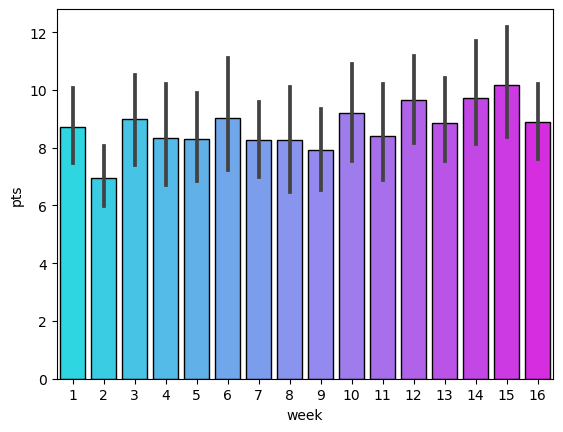

In [34]:
rush_df18 = weekly_breakdown(rushing_df,2018)

sns.barplot(y = rush_df18.pts, x = rush_df18.week, data = rush_df18, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

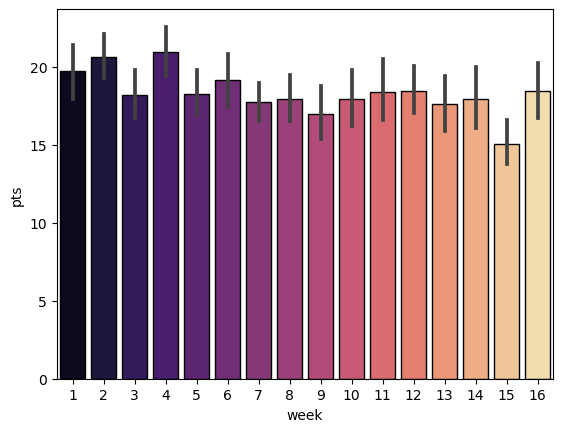

In [35]:
rec_df18 = weekly_breakdown(receiving_df, 2018)

sns.barplot(y = rec_df18.pts, x = rec_df18.week, data = rec_df18, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

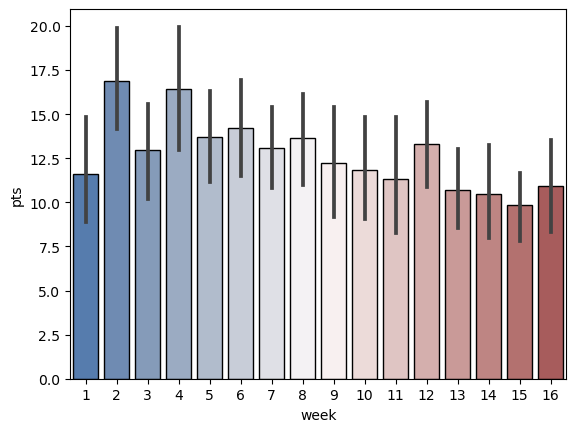

In [36]:
pa_df18 = weekly_breakdown(passing_df, 2018)

sns.barplot(y = pa_df18.pts, x = pa_df18.week, data = pa_df18, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

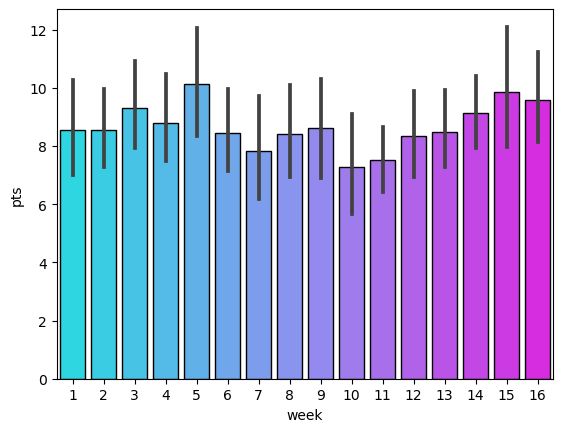

In [37]:
rush_df19 = weekly_breakdown(rushing_df,2019)

sns.barplot(y = rush_df19.pts, x = rush_df19.week, data = rush_df19, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

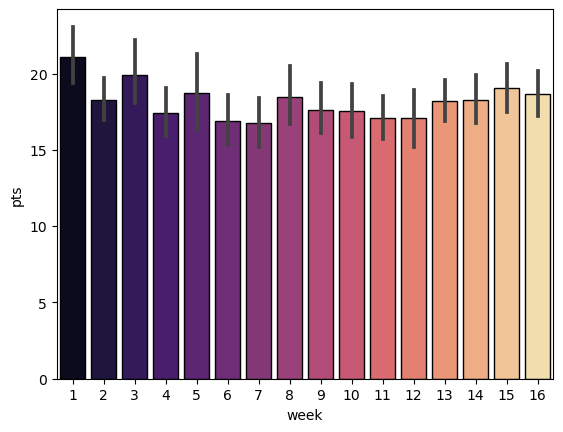

In [38]:
rec_df19 = weekly_breakdown(receiving_df, 2019)

sns.barplot(y = rec_df19.pts, x = rec_df19.week, data = rec_df19, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

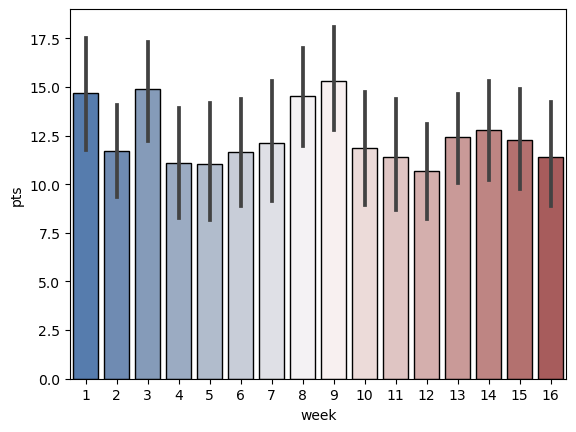

In [39]:
pa_df19 = weekly_breakdown(passing_df, 2019)

sns.barplot(y = pa_df19.pts, x = pa_df19.week, data = pa_df19, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

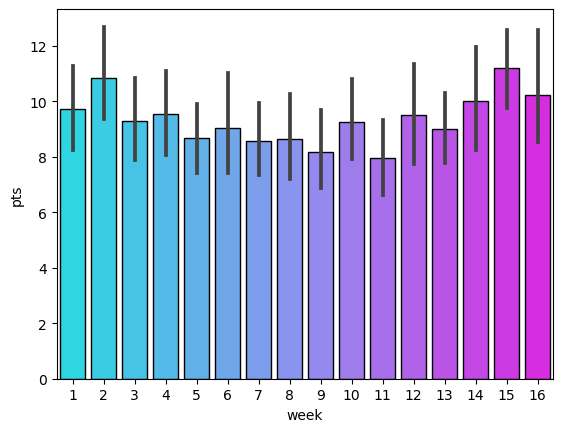

In [40]:
rush_df20 = weekly_breakdown(rushing_df,2020)

sns.barplot(y = rush_df20.pts, x = rush_df20.week, data = rush_df20, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

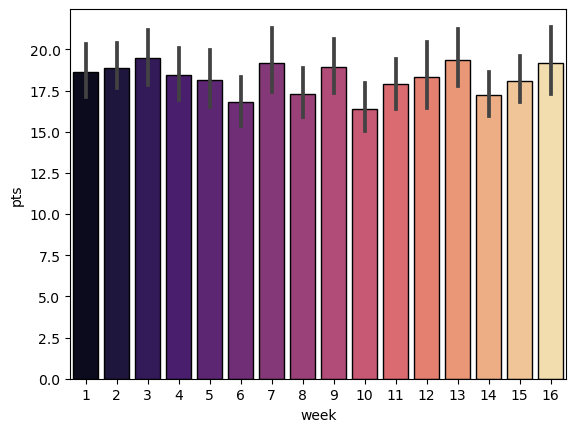

In [41]:
rec_df20 = weekly_breakdown(receiving_df, 2020)

sns.barplot(y = rec_df20.pts, x = rec_df20.week, data = rec_df20, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

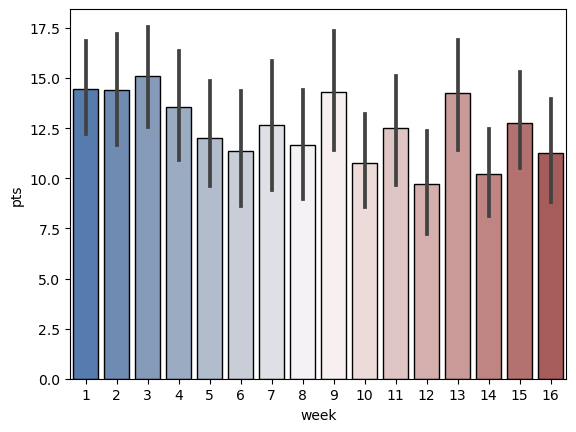

In [42]:
pa_df20 = weekly_breakdown(passing_df, 2020)

sns.barplot(y = pa_df20.pts, x = pa_df20.week, data = pa_df20, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

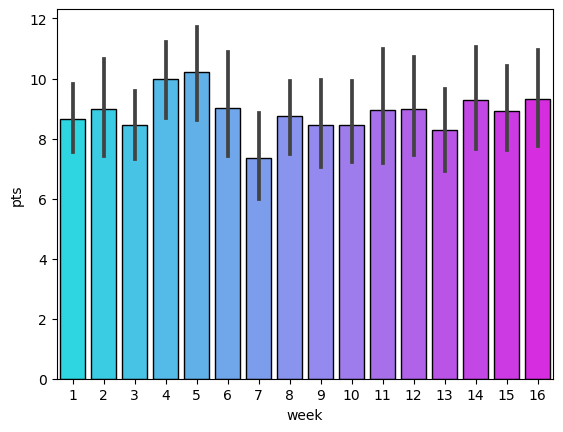

In [43]:
rush_df21 = weekly_breakdown(rushing_df,2021)

sns.barplot(y = rush_df21.pts, x = rush_df21.week, data = rush_df21, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

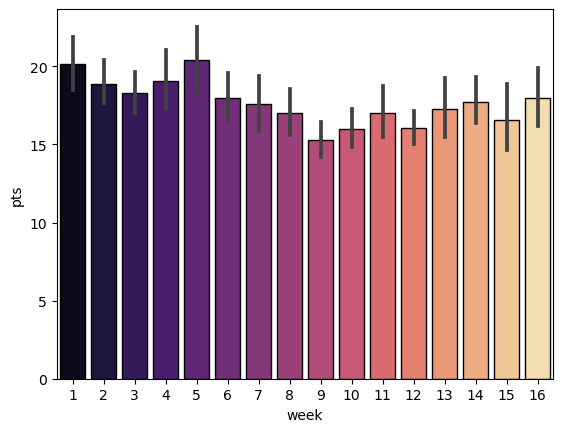

In [44]:
rec_df21 = weekly_breakdown(receiving_df, 2021)

sns.barplot(y = rec_df21.pts, x = rec_df21.week, data = rec_df21, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

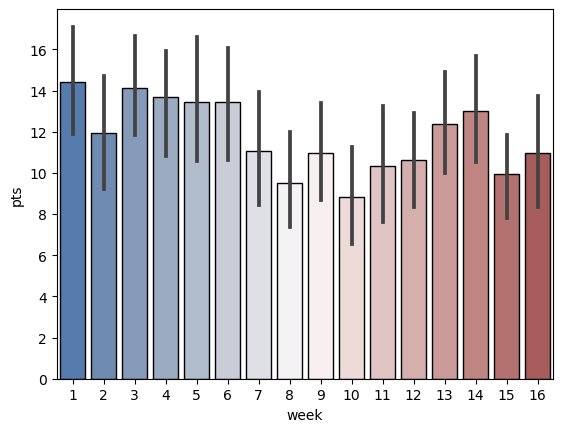

In [45]:
pa_df21 = weekly_breakdown(passing_df, 2021)

sns.barplot(y = pa_df21.pts, x = pa_df21.week, data = pa_df21, palette = 'vlag', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

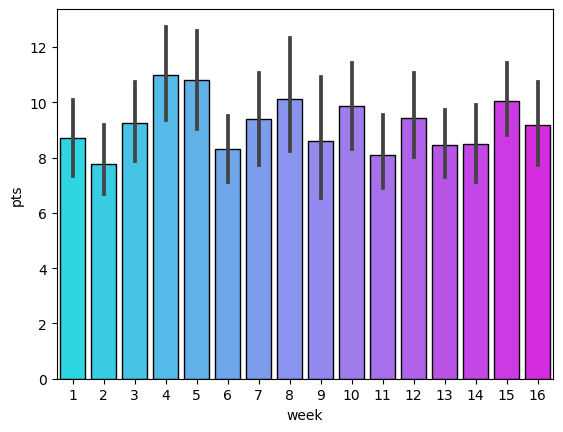

In [46]:
rush_df22 = weekly_breakdown(rushing_df,2022)

sns.barplot(y = rush_df22.pts, x = rush_df22.week, data = rush_df22, palette = 'cool', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

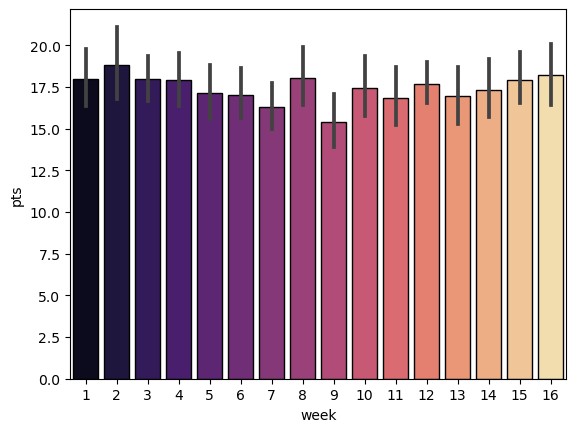

In [47]:
rec_df22 = weekly_breakdown(receiving_df, 2022)

sns.barplot(y = rec_df22.pts, x = rec_df22.week, data = rec_df22, palette = 'magma', edgecolor = 'black')

<AxesSubplot:xlabel='week', ylabel='pts'>

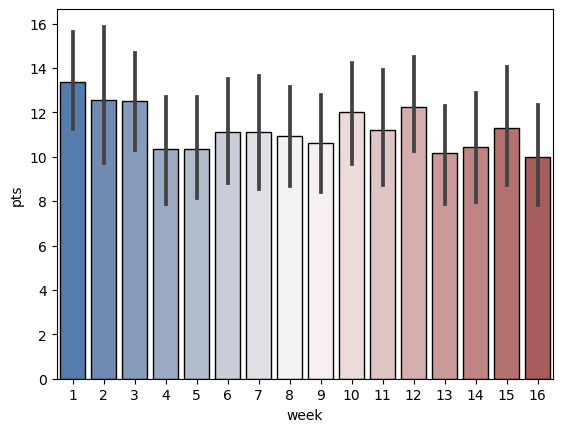

In [48]:
pa_df22 = weekly_breakdown(passing_df, 2022)

sns.barplot(y = pa_df22.pts, x = pa_df22.week, data = pa_df22, palette = 'vlag', edgecolor = 'black')

|Rushing weekly |Receiving Weekly|Passing Weekly|
|-|-|-|
|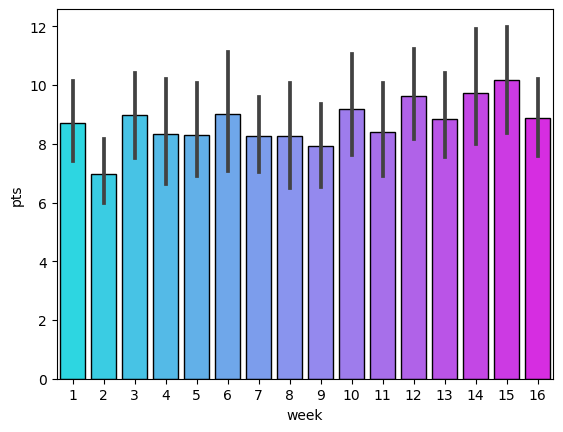| 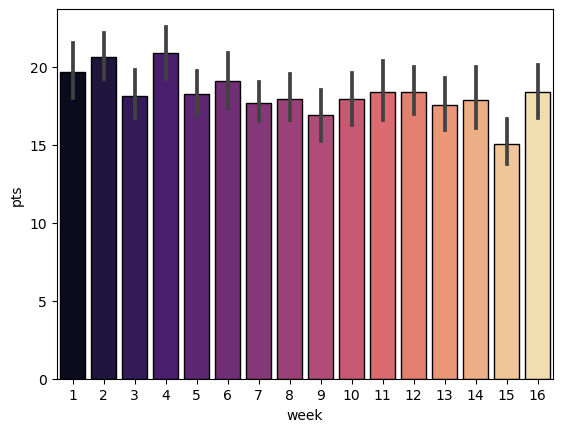|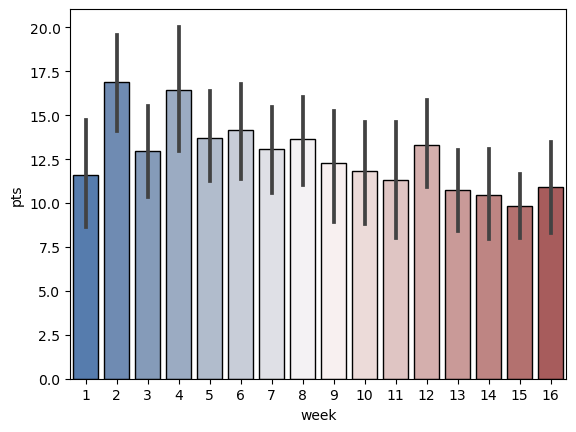|
|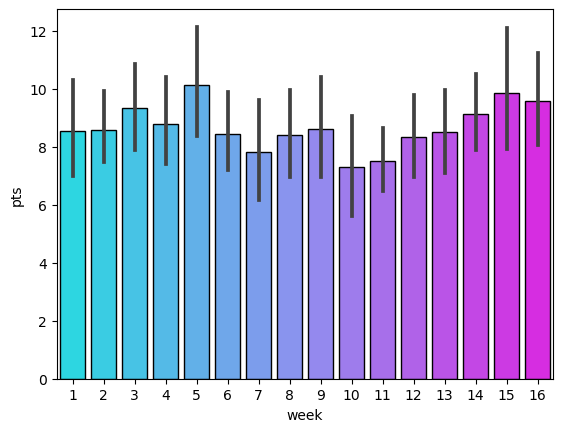|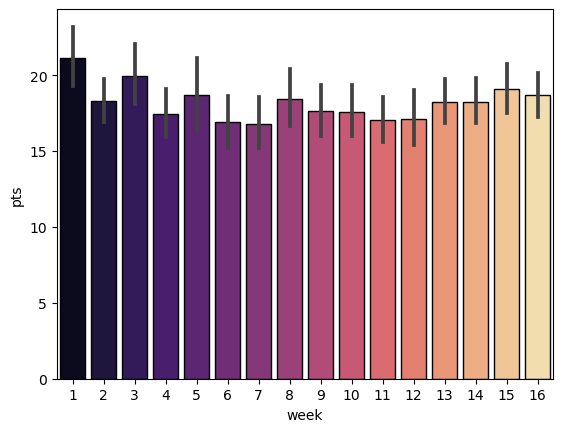|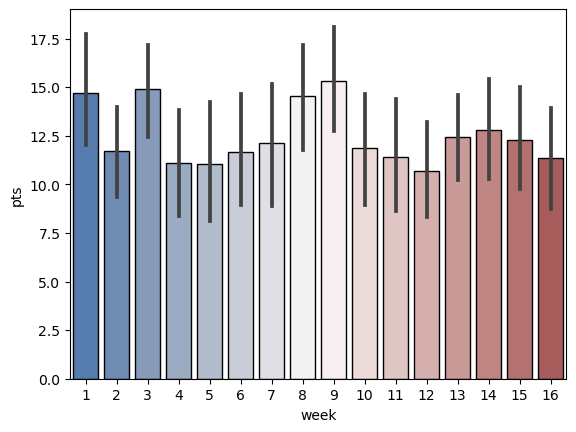
|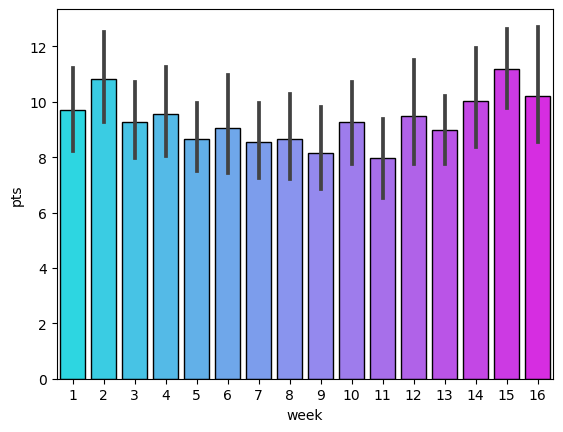|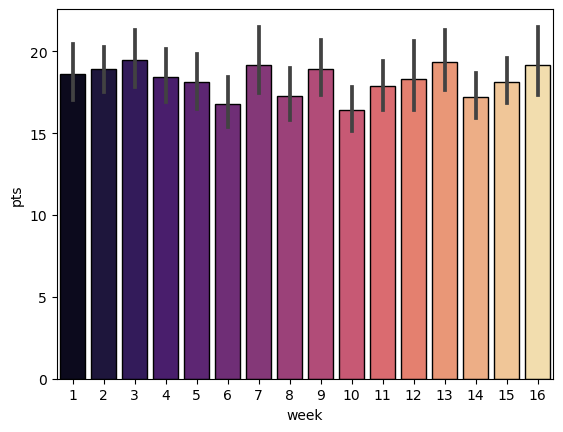|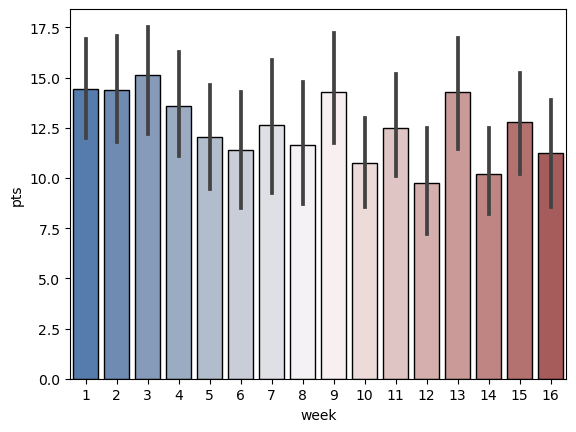
|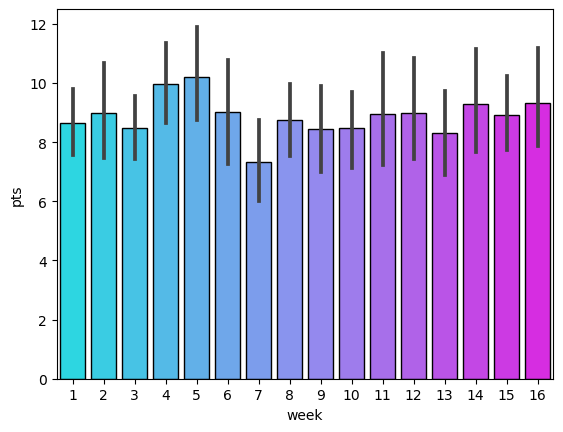|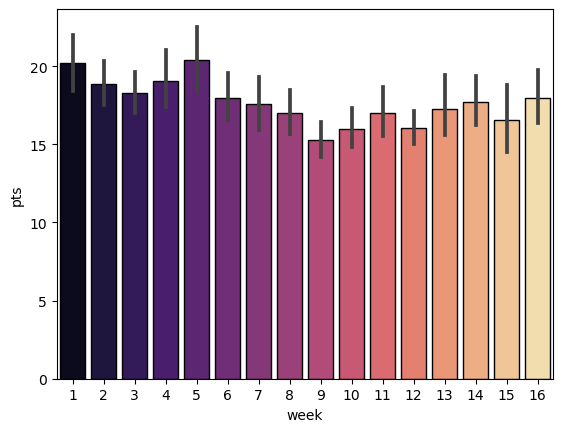|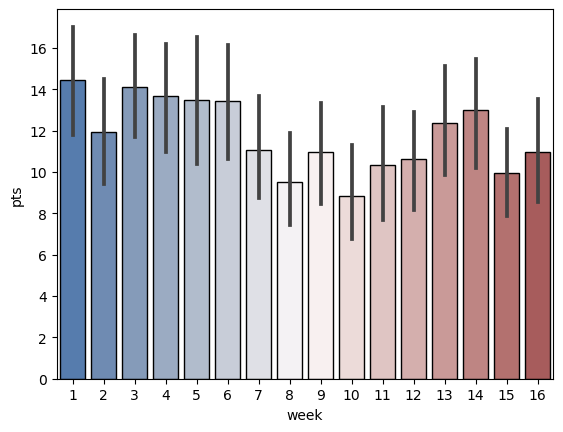
|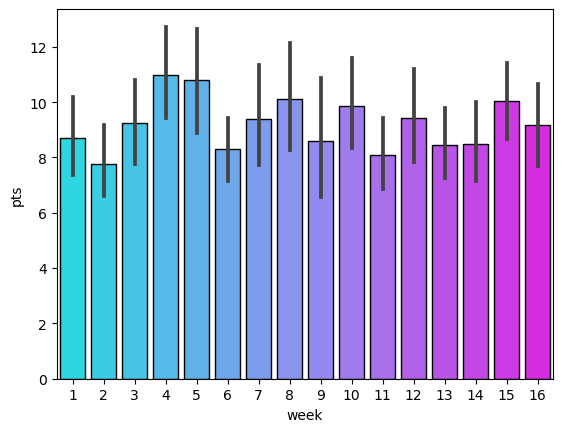|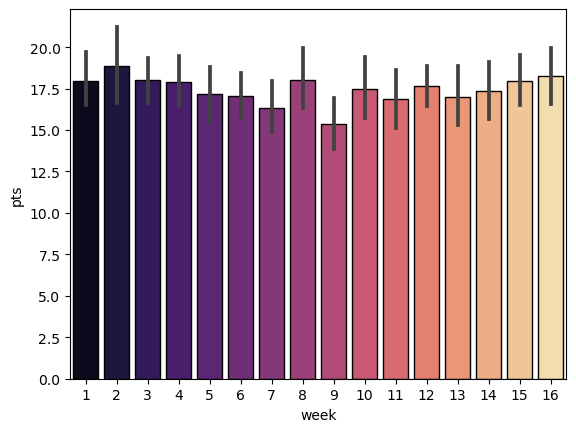|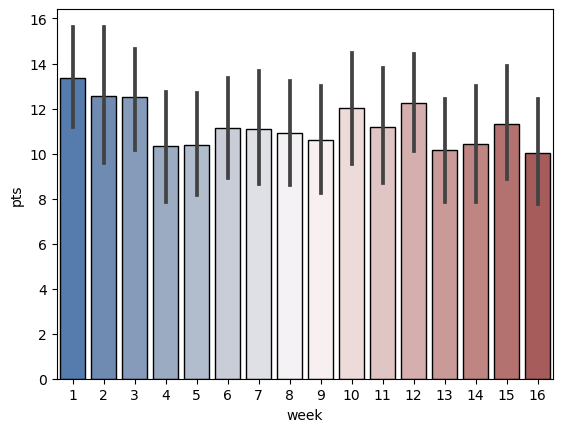


In [49]:
season_df = pd.read_csv('season.csv', index_col = 0)
season_df.pos.value_counts()

WR    1314
RB    1016
TE     736
QB     500
Name: pos, dtype: int64

In [50]:
season_df = season_df.replace(to_replace = 1824.0, value = 300)

In [51]:
season_df = season_df[season_df['ppr_pts'] > 50]

In [52]:
season_df = season_df[season_df['avg_draft_pos_ppr'] < 351]

In [53]:
s16_df = season_df[season_df['year'] == 2016]

In [54]:
s17_df = season_df[season_df['year'] == 2017]

In [55]:
s18_df = season_df[season_df['year'] == 2018]

In [56]:
s19_df = season_df[season_df['year'] == 2019]

In [57]:
s20_df = season_df[season_df['year'] == 2020]

In [58]:
s21_df = season_df[season_df['year'] == 2021]

In [59]:
s22_df = season_df[season_df['year'] == 2022]

>>>>>> # Functions by position breakdown

In [60]:
def qb_df(df):
    qb_df = df[df['pos'] == 'QB']
    return qb_df

In [61]:
def wr_df(df):
    wr_df = df[df['pos'] == 'WR']
    return wr_df

In [62]:
def rb_df(df):
    rb_df = df[df['pos'] == 'RB']
    return rb_df

In [63]:
def te_df(df):
    te_df = df[df['pos'] == 'TE']
    return te_df

>>>>>> # Visual Functions by position breakdown

In [64]:
def qb_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [65]:
def wr_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [66]:
def rb_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [67]:
def te_viz(df):
    sns.relplot(y = df['ppr_pts'], x = df['avg_draft_pos_ppr'], palette = 'gist_ncar', data = df)
    plt.show()

In [68]:
qb16 = qb_df(s16_df)

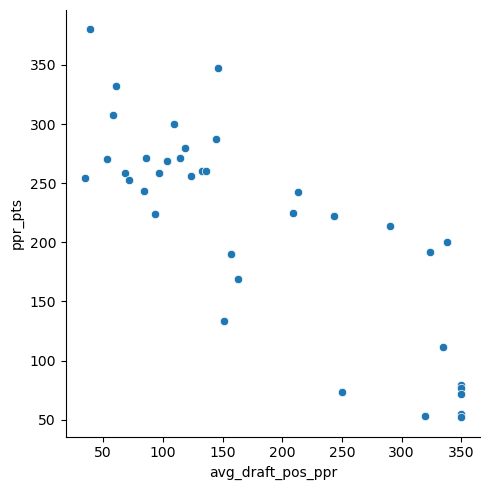

In [69]:
sns.relplot(y = qb16['ppr_pts'], x = qb16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = qb16)

In [70]:
wr16 = wr_df(s16_df)

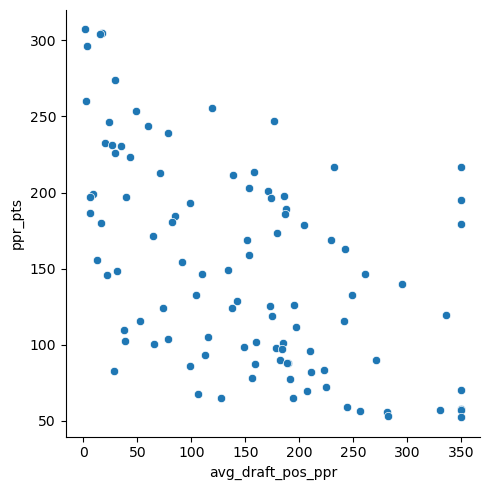

In [71]:
sns.relplot(y = wr16['ppr_pts'], x = wr16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = wr16)

In [72]:
rb16 = rb_df(s16_df)

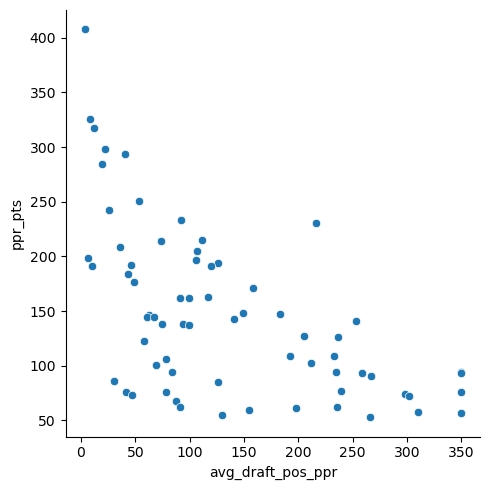

In [73]:
sns.relplot(y = rb16['ppr_pts'], x = rb16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = rb16)

In [74]:
te16 = te_df(s16_df)

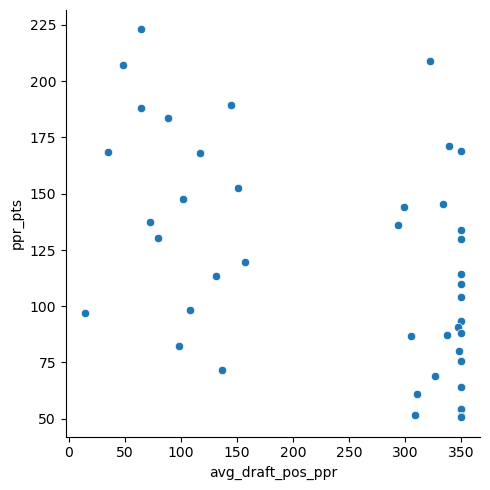

In [75]:
sns.relplot(y = te16['ppr_pts'], x = te16['avg_draft_pos_ppr'], palette = 'gist_ncar', data = te16)

In [76]:
qb17 = qb_df(s17_df)

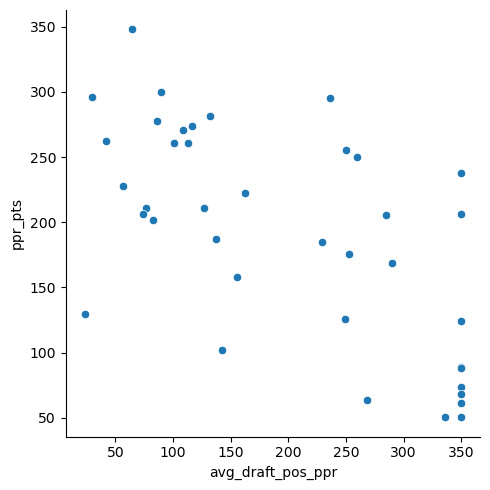

In [77]:
sns.relplot(y = qb17['ppr_pts'], x = qb17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = qb17)

In [78]:
wr17 = wr_df(s17_df)

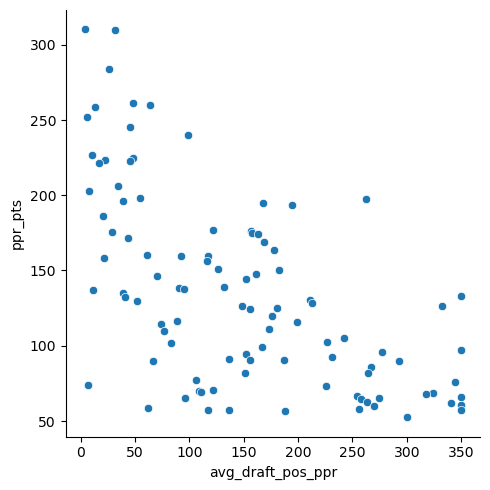

In [79]:
sns.relplot(y = wr17['ppr_pts'], x = wr17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = wr17)

In [80]:
rb17 = rb_df(s17_df)

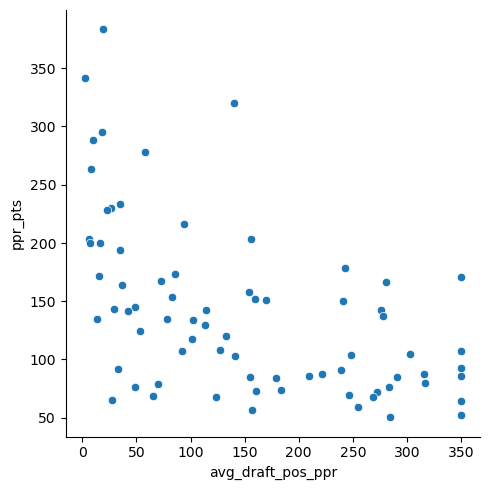

In [81]:
sns.relplot(y = rb17['ppr_pts'], x = rb17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = rb17)

In [82]:
te17 = te_df(s17_df)

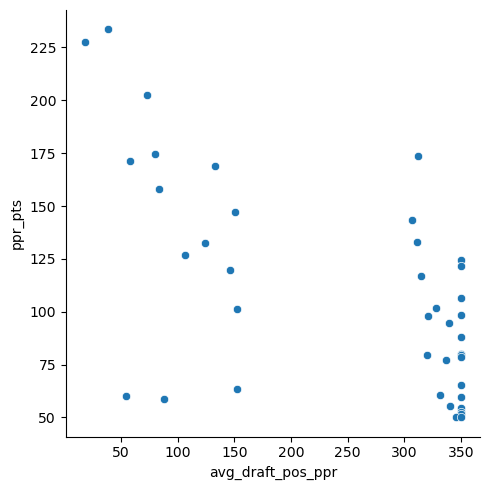

In [83]:
sns.relplot(y = te17['ppr_pts'], x = te17['avg_draft_pos_ppr'], palette = 'gist_ncar', data = te17)

In [84]:
qb18 = qb_df(s18_df)

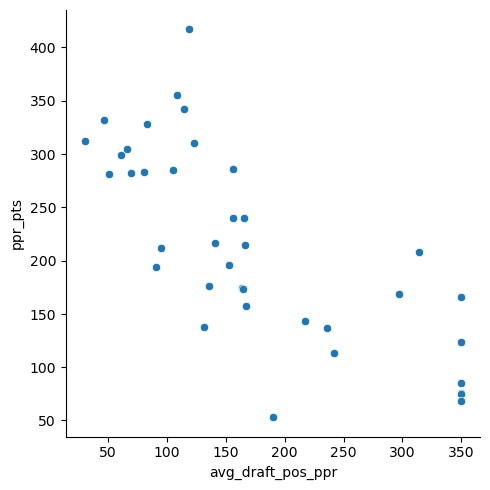

In [85]:
qb_viz(qb18)

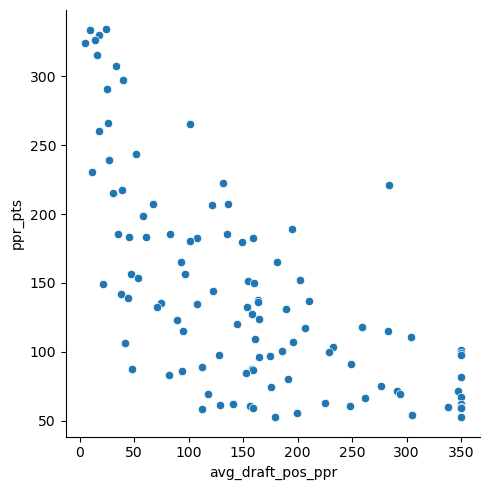

In [86]:
wr18 = wr_df(s18_df)
wr_viz(wr18)

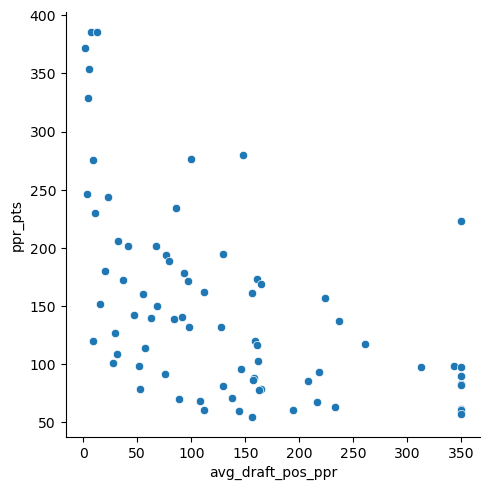

In [87]:
rb18 = rb_df(s18_df)
rb_viz(rb18)

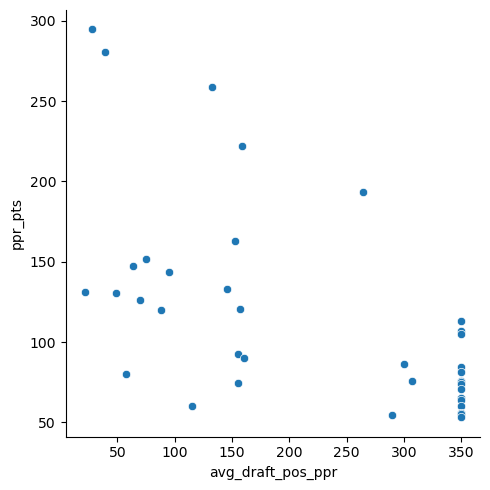

In [88]:
te18 = te_df(s18_df)
te_viz(te18)

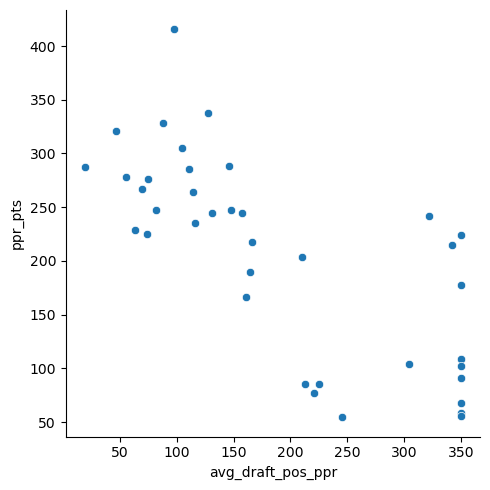

In [89]:
qb19 = qb_df(s19_df)
qb_viz(qb19)

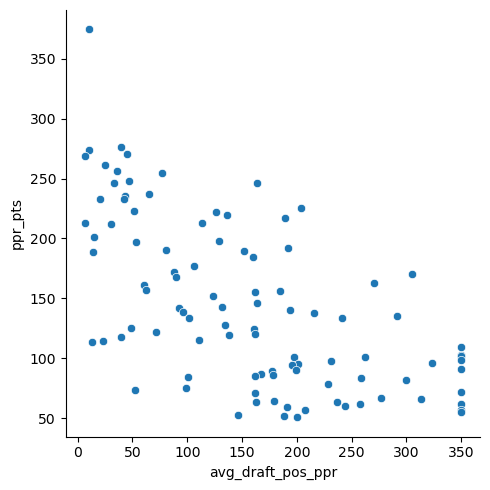

In [90]:
wr19 = wr_df(s19_df)
wr_viz(wr19)

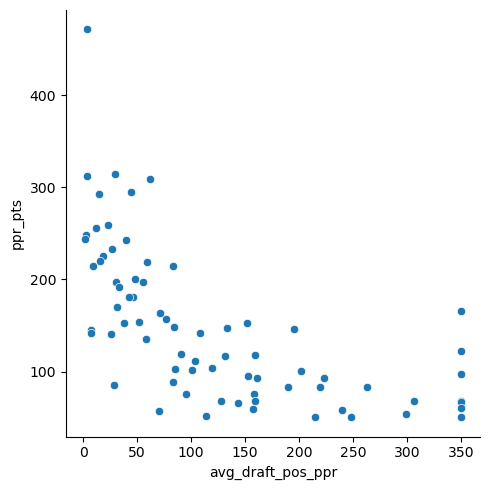

In [91]:
rb19 = rb_df(s19_df)
rb_viz(rb19)

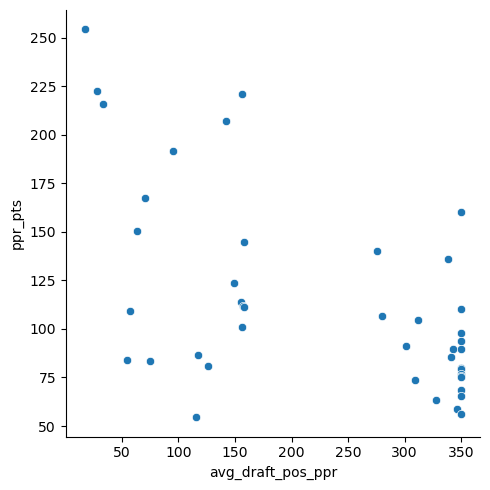

In [92]:
te19 = te_df(s19_df)
te_viz(te19)

|2016 QB |2016 WR|2016 RB|2016 TE|
|-|-|-|-|
|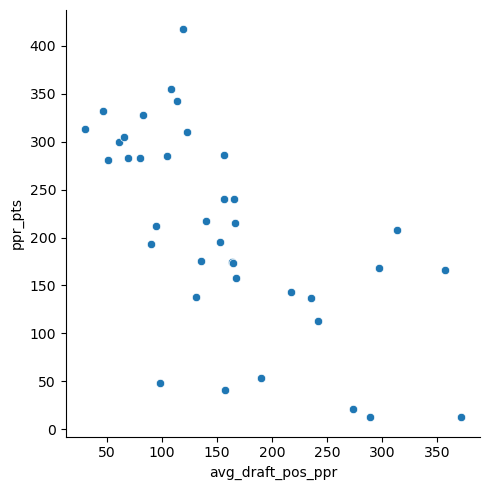|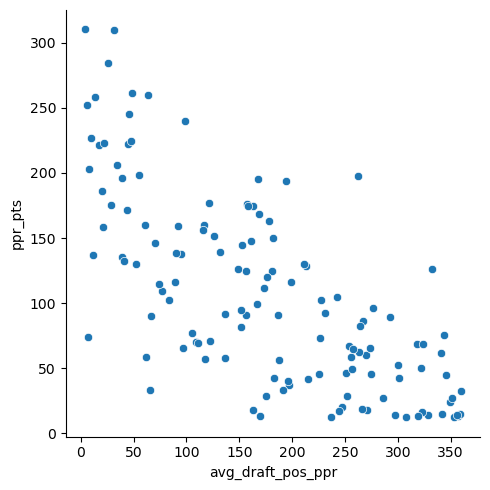|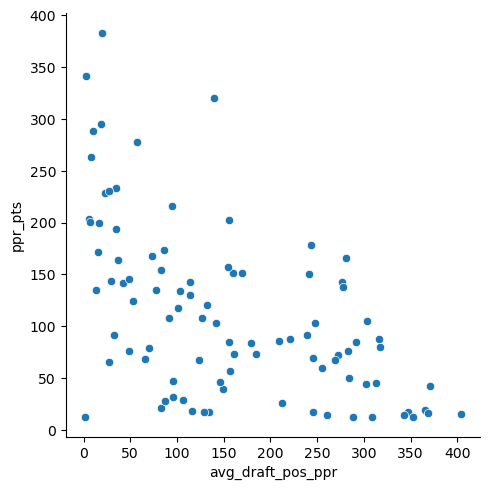|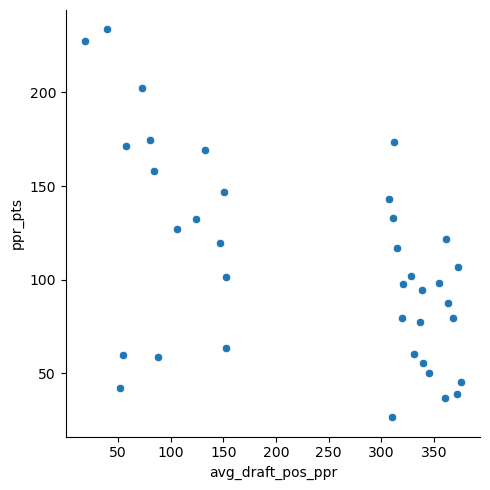|
|2017 QB |2017 WR|2017 RB|2017 TE|
|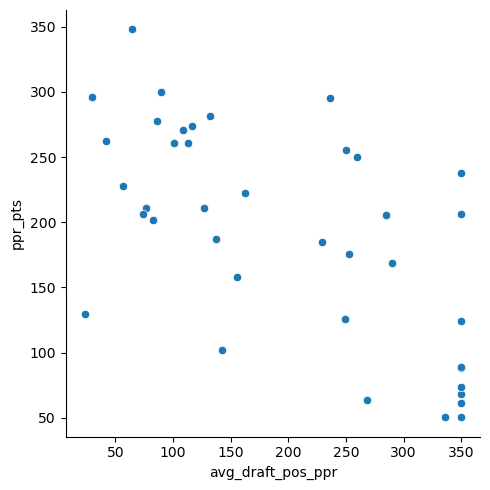|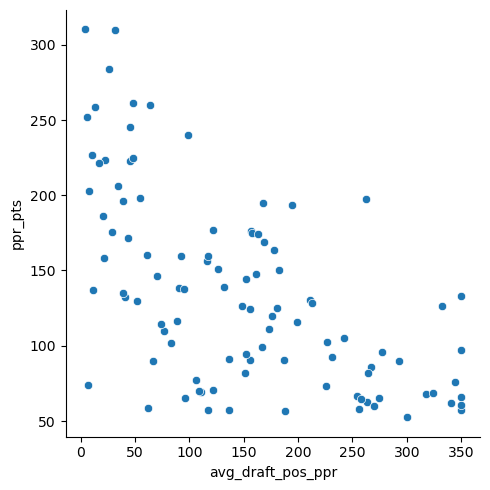|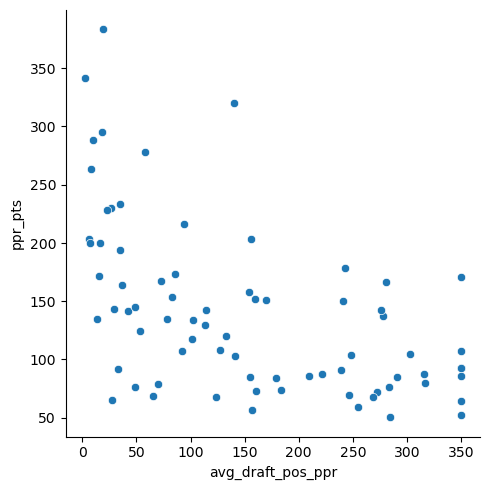|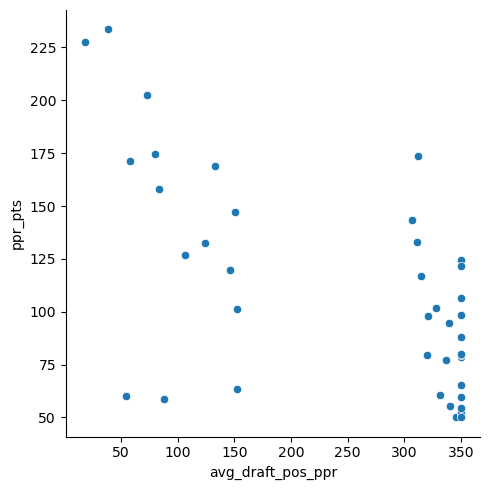|
|2018 QB |2018 WR|2018 RB|2018 TE|
|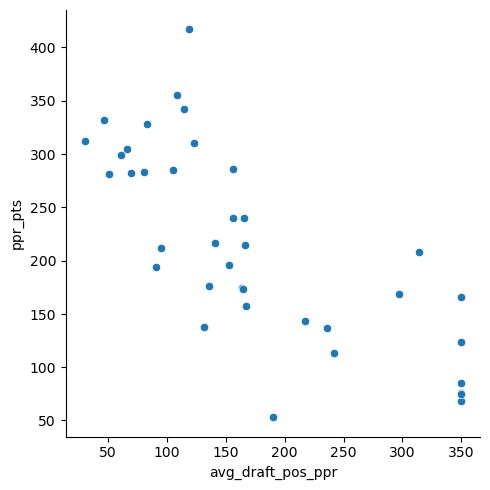|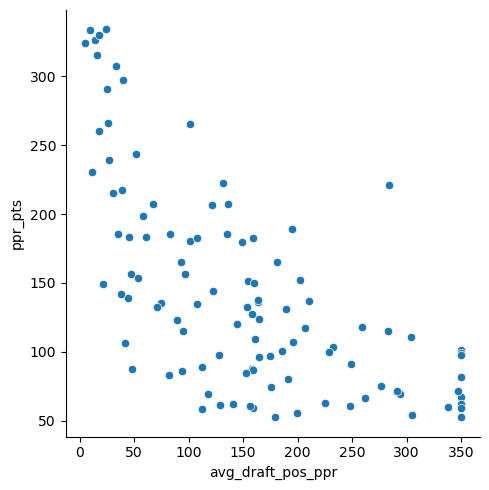|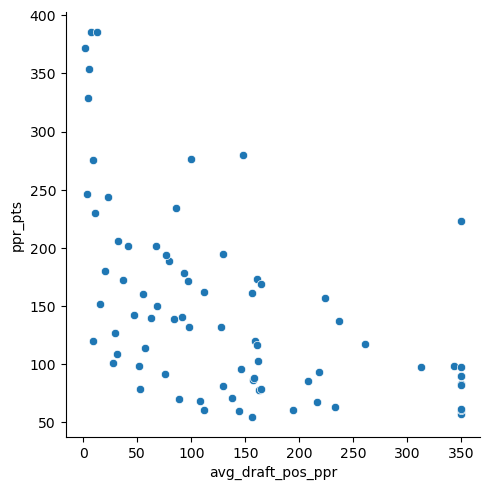|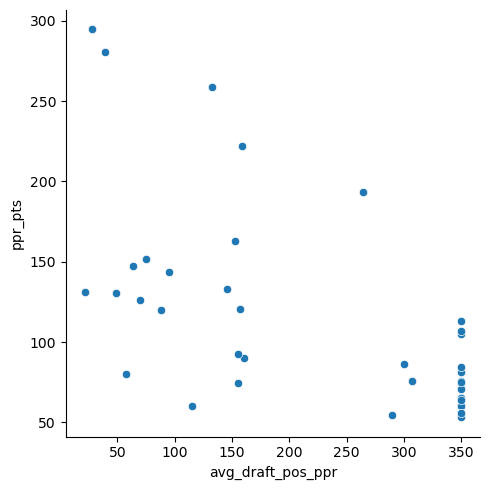|
|2019 QB |2019 WR|2019 RB|2019 TE|
|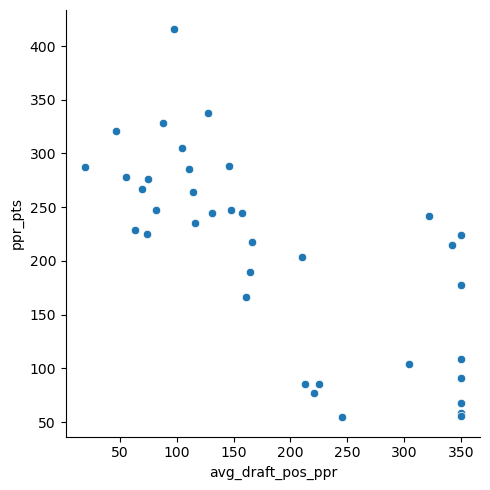|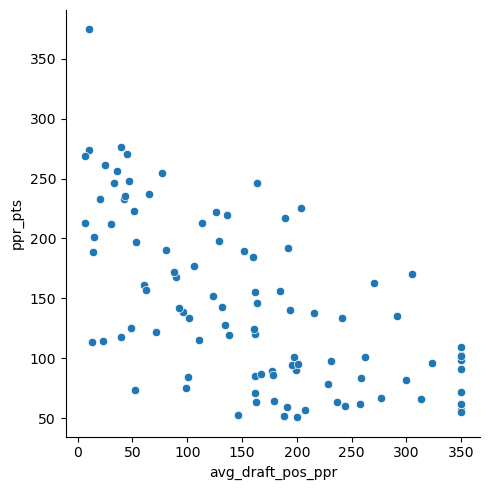|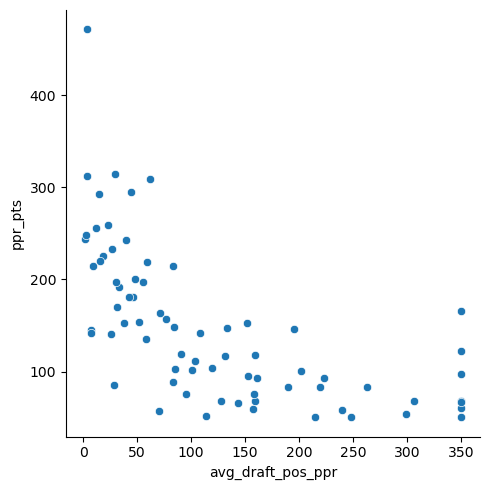|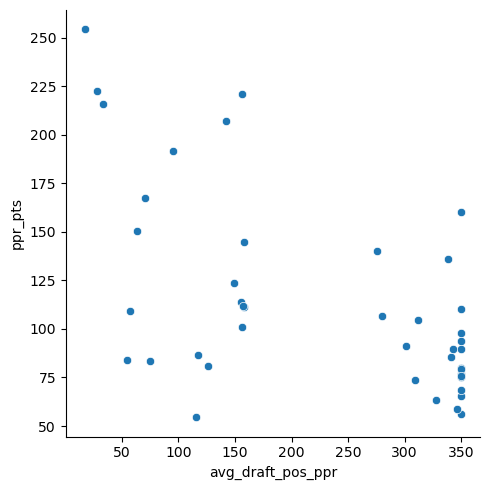|
|2020 QB |2020 WR|2020 RB|2020 TE|
|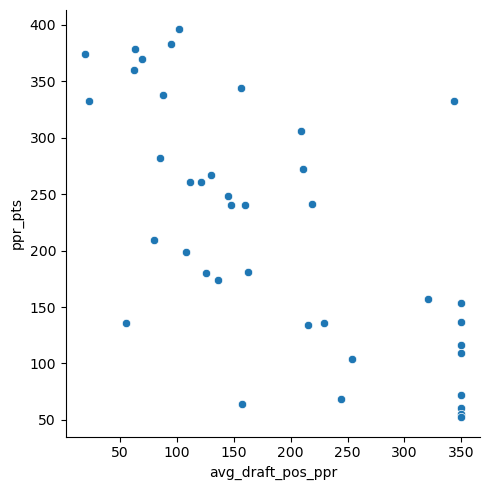|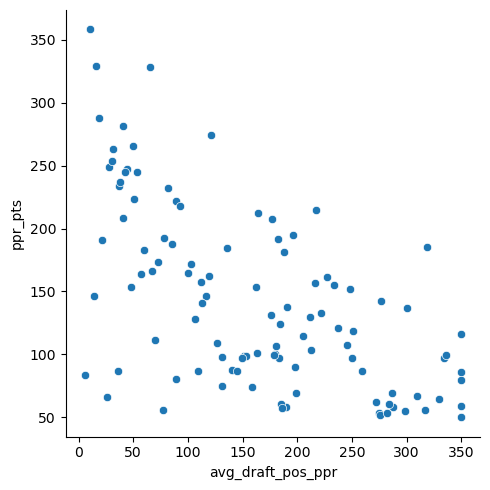|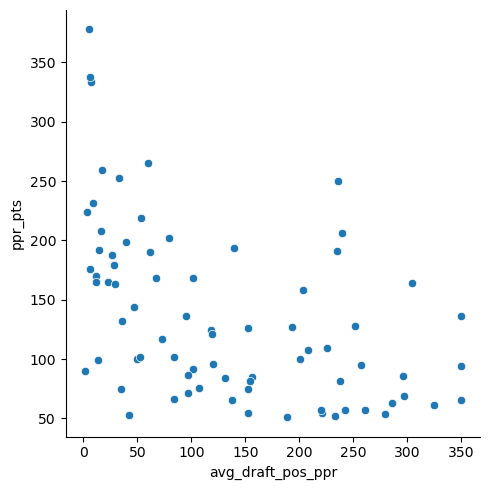|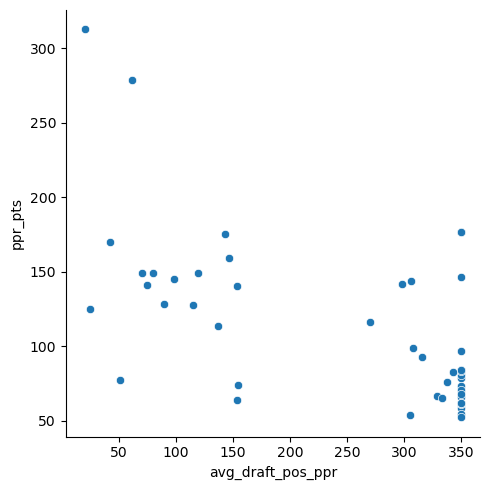|
|2021 QB |2021 WR|2021 RB|2021 TE|
|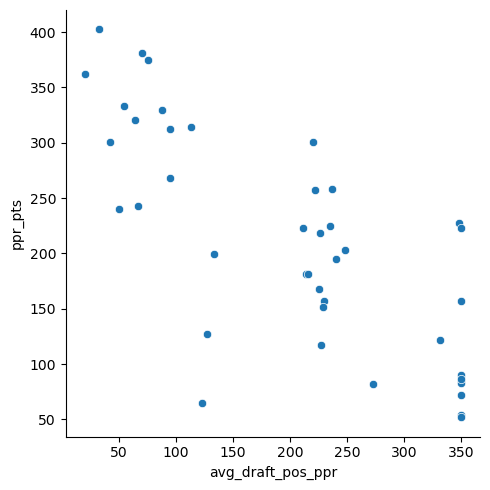|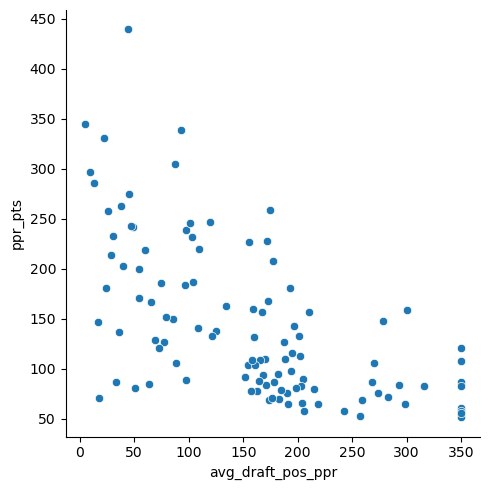|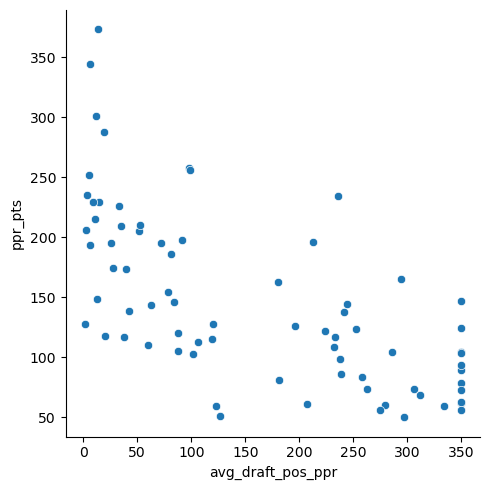|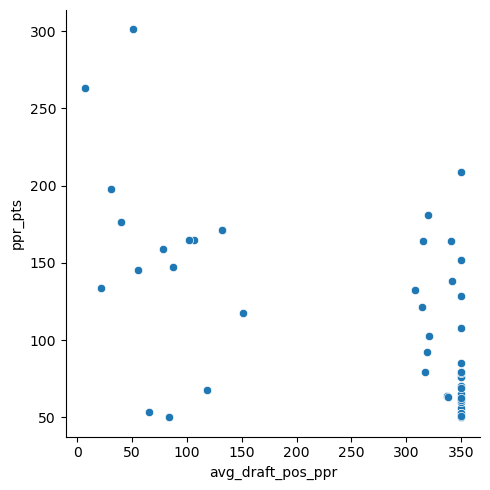|
|2022 QB |2022 WR|2022 RB|2022 TE|
|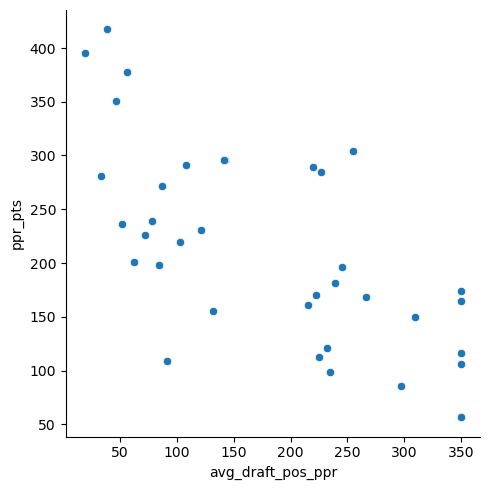|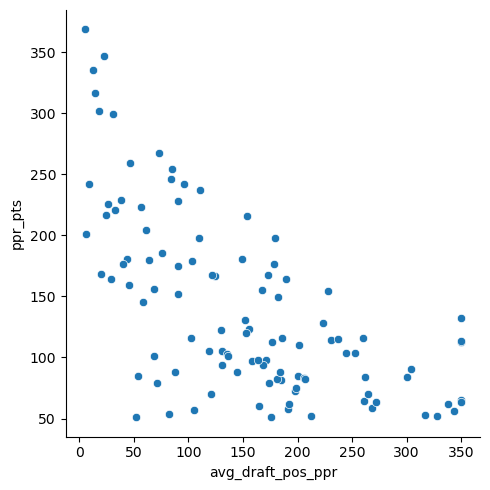|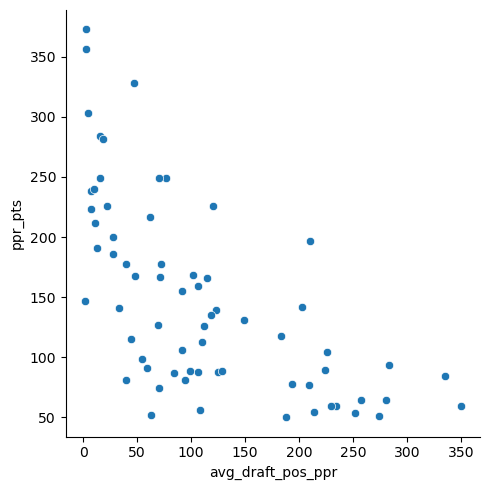|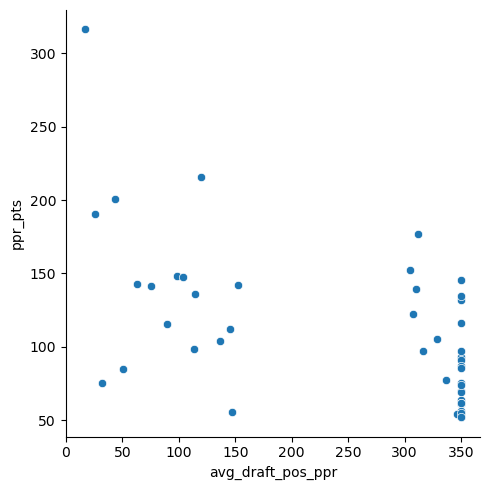|

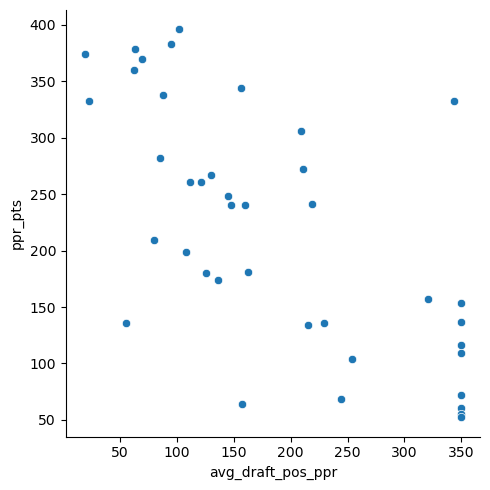

In [93]:
qb20 = qb_df(s20_df)
qb_viz(qb20)

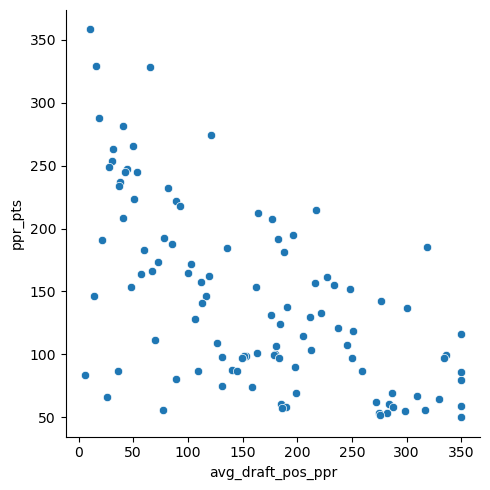

In [94]:
wr20 = wr_df(s20_df)
wr_viz(wr20)

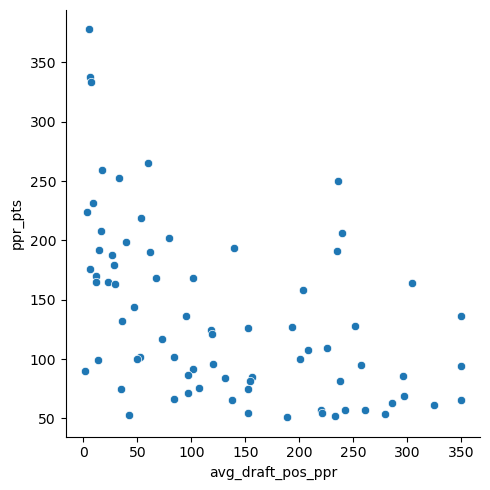

In [95]:
rb20 = rb_df(s20_df)
rb_viz(rb20)

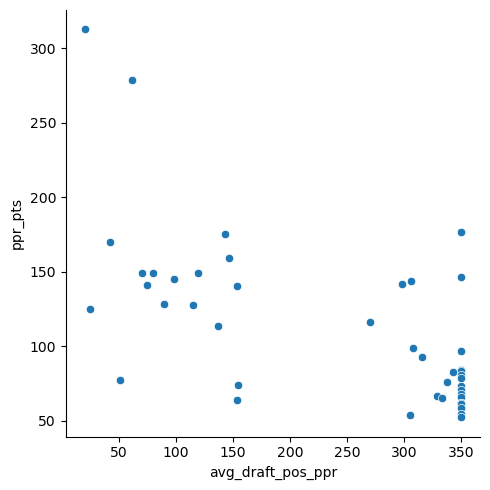

In [96]:
te20 = te_df(s20_df)
te_viz(te20)

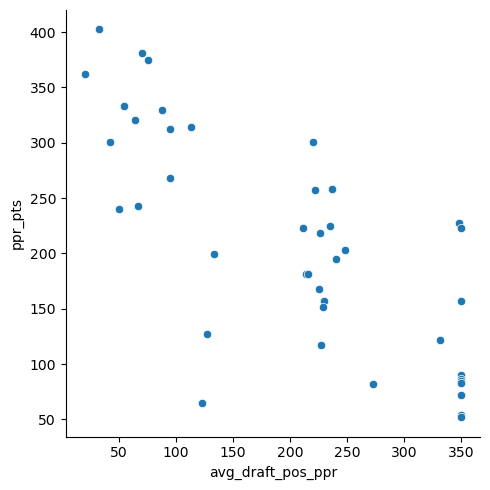

In [97]:
qb21 = qb_df(s21_df)
qb_viz(qb21)

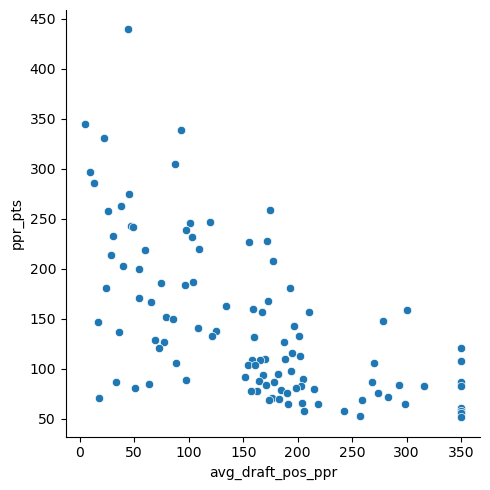

In [98]:
wr21 = wr_df(s21_df)
wr_viz(wr21)

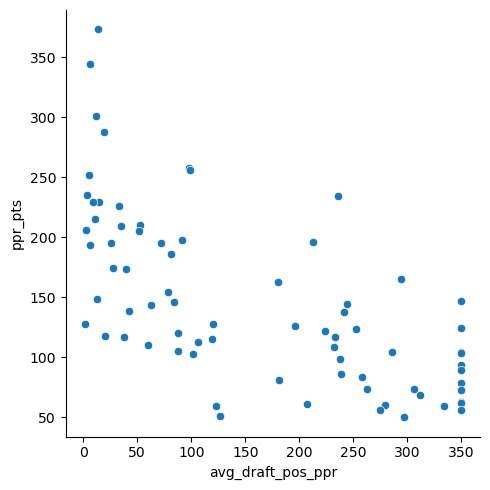

In [99]:
rb21 = rb_df(s21_df)
rb_viz(rb21)

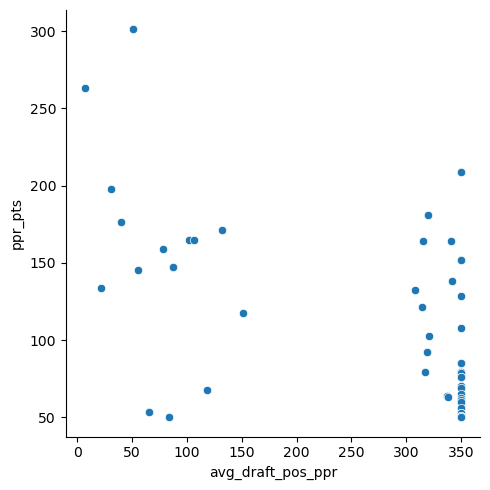

In [100]:
te21 = te_df(s21_df)
te_viz(te21)

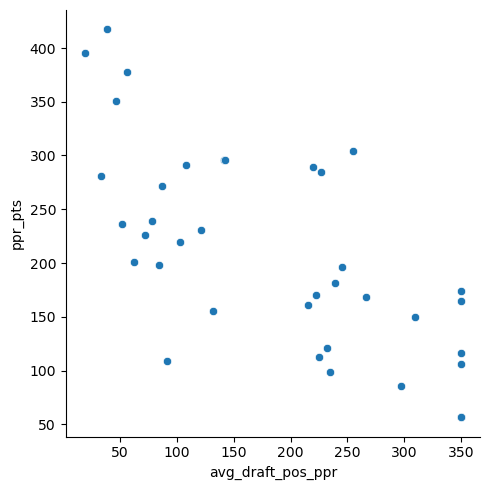

In [101]:
qb22 = qb_df(s22_df)
qb_viz(qb22)

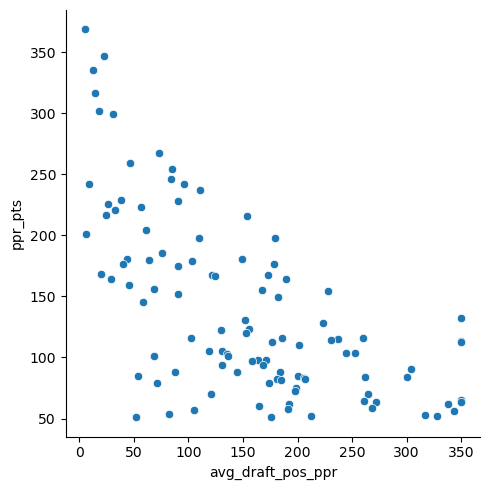

In [102]:
wr22 = wr_df(s22_df)
wr_viz(wr22)

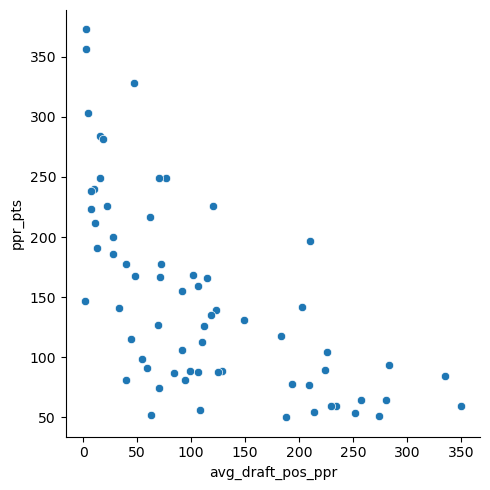

In [103]:
rb22 = rb_df(s22_df)
rb_viz(rb22)

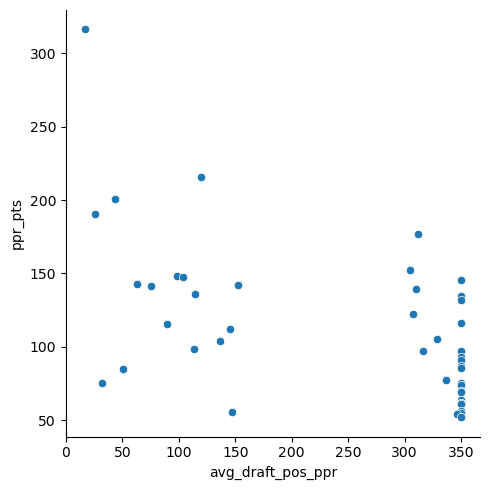

In [104]:
te22 = te_df(s22_df)
te_viz(te22)

>>>>>>>>>>> # Positional Tier Binning

In [105]:
tier_diffrb16 = rb16.sort_values('ppr_pts', ascending = False).head(36)
tier_diffrb16['tier'] = 0
tier_diff = (tier_diffrb16['ppr_pts'].max() - tier_diffrb16['ppr_pts'].min()) / 4
tier_diff

67.7

In [106]:
tier_diffrb16['tier'] = pd.cut(tier_diffrb16['ppr_pts'], [136.9, 204.7, 272.4, 340.1, 407.8], 
                               labels=['tier 4', 'tier 3', 'tier 2', 'tier 1'])

In [107]:
tier_diffrb16['tier'].value_counts()

tier 4    22
tier 3     8
tier 2     5
tier 1     1
Name: tier, dtype: int64

In [108]:
tier_diffrb16[['player', 'ppr_pts', 'tier']].head()

,player,ppr_pts,tier
66,David Johnson,407.8,tier 1
67,Ezekiel Elliott,325.4,tier 2
68,Le'Veon Bell,317.4,tier 2
69,LeSean McCoy,298.3,tier 2
70,DeMarco Murray,293.8,tier 2


>>>>>>>>>>> # ADP binning

In [109]:
draft_sect_qb16 = qb16.sort_values('ppr_pts', ascending = False)

In [110]:
draft_sect_qb16['draft_sect'] = pd.cut(draft_sect_qb16['avg_draft_pos_ppr'], 2, 
                               labels=['1st half', '2nd half'])

In [111]:
draft_sect_qb16 = draft_sect_qb16.reset_index(drop = True)

In [112]:
drop_cols = ['standard_pts', 'avg_draft_pos', 'pos_rank', 'rk']

In [113]:
draft_sect_qb16 = draft_sect_qb16.drop(columns = drop_cols)

In [114]:
draft_sect_qb16 = draft_sect_qb16.sort_values('avg_draft_pos_ppr')
draft_sect_qb16 = draft_sect_qb16.reset_index(drop = True)
draft_sect_qb16['pick_no'] = draft_sect_qb16.index + 1
draft_sect_qb16.head()

,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,year,avg_draft_pos_ppr,adp_by_pos,success,round,draft_sect,pick_no
0,Cam Newton,CAR,QB,27,15,14,270.0,510.0,3509.0,19.0,14.0,90.0,359.0,3.99,5.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,5,254.3,0.0,2016,34.5,1,0.0,3.0,1st half,1
1,Aaron Rodgers,GNB,QB,33,16,16,401.0,610.0,4428.0,40.0,7.0,67.0,369.0,5.51,4.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,4,380.0,119.0,2016,38.7,2,1.0,4.0,1st half,2
2,Russell Wilson,SEA,QB,28,16,16,353.0,546.0,4219.0,21.0,11.0,72.0,259.0,3.60,1.0,2.0,2.0,14.0,7.0,1.0,8.0,2.0,2,270.1,7.0,2016,53.2,3,0.0,5.0,1st half,3
3,Andrew Luck,IND,QB,27,15,15,346.0,545.0,4240.0,31.0,13.0,64.0,341.0,5.33,2.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,2,307.7,47.0,2016,58.3,4,1.0,5.0,1st half,4
4,Drew Brees,NOR,QB,37,16,16,471.0,673.0,5208.0,37.0,15.0,23.0,20.0,0.87,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2,332.3,72.0,2016,61.1,5,1.0,6.0,1st half,5


In [115]:
#draft_sect_qb16['success'] = (draft_sect_qb16.draft_sect=='1st half') & (draft_sect_qb16.pos_rank<7)

In [116]:
df = pd.read_csv('season1.csv',index_col=0)

seasons = range(2010,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('adp').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
        
for i in range(0,len(df.index)):
    if df.loc[i,'adp'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'adp'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'adp'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'adp'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'adp'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'adp'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'adp'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'adp'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'adp'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'adp'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'adp'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'adp'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'adp'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'adp'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

In [117]:
new16_df = df[df['year'] == 2016]

In [118]:
new17_df = df[df['year'] == 2017]

In [119]:
new18_df = df[df['year'] == 2018]

In [120]:
new19_df = df[df['year'] == 2019]

In [121]:
new20_df = df[df['year'] == 2020]

In [122]:
new21_df = df[df['year'] == 2021]

In [123]:
new22_df = df[df['year'] == 2022]

In [124]:
def positional_df(df, pos):
    df = df[df['pos'] == pos]
    return df

In [125]:
def results(df):
    success_rate = []

    for i in range(1, 16):
        rate = df[df['round']==i]
        rate = rate.success.sum() / 12
        success_rate.append(rate)
    return success_rate

In [126]:
a = positional_df(new16_df, 'RB')

In [127]:
a = results(a)

In [128]:
rounds = range(1,16)
seasons = range(2016,2023)
pos = ['QB','RB','WR','TE']
qb = []
rb = []
wr = []
te = []
ro = []
pos_name = [qb,rb,wr,te]

for s in seasons:
    df1 = df[df.year==s]
    for r in rounds:
        ro.append(r)
        for p,n in zip(pos,pos_name):
            if df1[(df1['round']==r) & (df1.pos==p)].success.count() == 0:
                n.append(0)
                
            else:
                n.append(df1[(df1['round']==r) & (df1.pos==p)].success.sum()/df1[(df1['round']==r) & (df1.pos==p)].success.count())
               

year = []
for s in seasons:
    for r in rounds:
        year.append(s)
        
df_success = pd.DataFrame({'season':year,'qb':qb,'rb':rb,'wr':wr,'te':te,'rounds':ro})

In [129]:
df_success.to_csv('success_rate.csv')

In [130]:
success_rate_df = pd.read_csv('success_rate.csv')

In [131]:
df_by_round = pd.DataFrame(df_success.groupby('rounds').mean()[['qb','rb','wr','te']])

In [132]:
df_by_season = pd.DataFrame(df_success.groupby('season').mean()[['qb','rb','wr','te']])

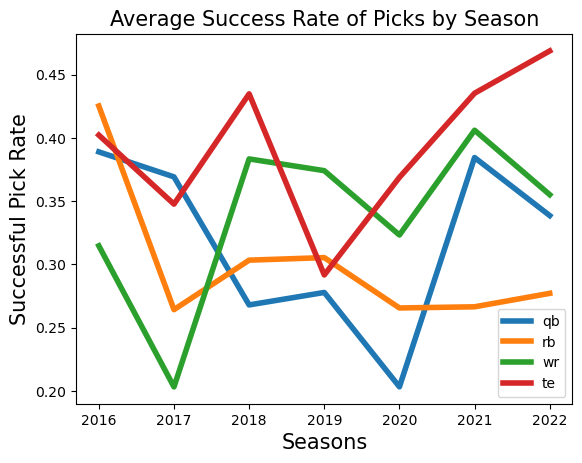

In [133]:
plt.plot(df_by_season, linewidth = 4)
plt.legend(['qb', 'rb', 'wr', 'te'])
plt.title('Average Success Rate of Picks by Season', fontdict = { 'fontsize': 15})
plt.ylabel('Successful Pick Rate', fontdict = { 'fontsize': 15})
plt.xlabel('Seasons', fontdict = { 'fontsize': 15})
plt.show()

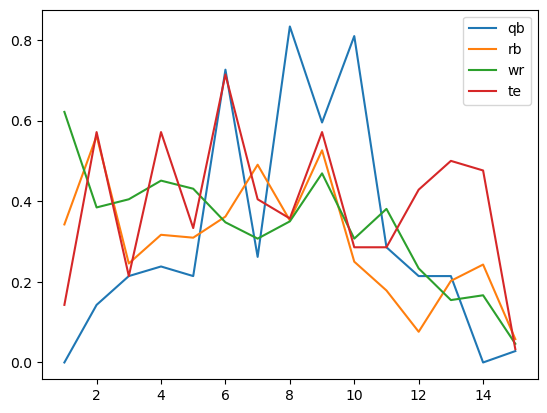

In [134]:
plt.plot(df_by_round)
plt.legend(['qb', 'rb', 'wr', 'te'])
plt.show()

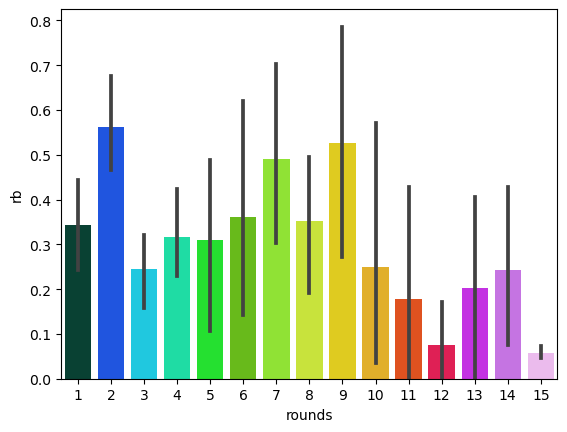

In [135]:
sns.barplot(y = 'rb', x = 'rounds', palette = 'gist_ncar', data = df_success)
plt.show() 

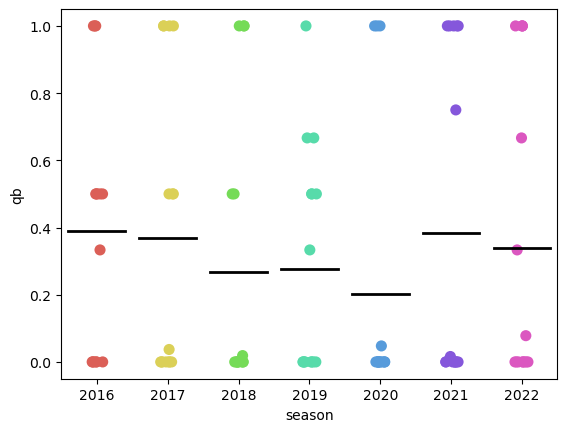

In [136]:
# Creating a visual displaying amount distro comapred to mean
p = sns.stripplot(y = 'qb', x = 'season', data = df_success, size = 8, palette = 'hls')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="season",
            y="qb",
            data=df_success,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.show()

In [137]:
rb22.sort_values('ppr_pts', ascending = False)

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos,success,round
3123,Austin Ekeler,6,LAC,RB,27,17,17,0.0,0.0,0.0,0.0,0.0,204.0,915.0,4.49,13.0,127.0,107.0,722.0,6.75,5.0,5.0,3.0,18,266.0,372.7,118.0,1,2022,7.2,2.7,3,1.0,1.0
3124,Christian McCaffrey,3,2TM,RB,26,17,16,1.0,1.0,34.0,1.0,0.0,244.0,1139.0,4.67,8.0,108.0,85.0,741.0,8.72,5.0,1.0,0.0,13,271.0,356.4,123.0,2,2022,2.6,2.4,2,1.0,1.0
3125,Josh Jacobs,2,LVR,RB,24,17,17,0.0,0.0,0.0,0.0,0.0,340.0,1653.0,4.86,12.0,64.0,53.0,400.0,7.55,0.0,3.0,1.0,12,275.0,328.3,127.0,3,2022,42.7,47.3,22,1.0,4.0
3126,Derrick Henry,4,TEN,RB,28,16,16,2.0,2.0,4.0,1.0,0.0,349.0,1538.0,4.41,13.0,41.0,33.0,398.0,12.06,0.0,6.0,3.0,13,270.0,302.8,122.0,4,2022,2.3,4.2,4,1.0,1.0
3127,Saquon Barkley,15,NYG,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,295.0,1312.0,4.45,10.0,76.0,57.0,338.0,5.93,0.0,1.0,0.0,10,227.0,284.0,82.0,5,2022,18.8,16.0,11,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,Ameer Abdullah,296,LVR,RB,29,17,0,0.0,0.0,0.0,0.0,0.0,4.0,20.0,5.00,0.0,32.0,25.0,211.0,8.44,1.0,0.0,0.0,1,29.0,54.1,0.0,63,2022,233.0,214.0,62,0.0,15.0
3186,Kyle Juszczyk,274,SFO,RB,31,16,12,0.0,0.0,0.0,0.0,0.0,7.0,26.0,3.71,1.0,23.0,19.0,200.0,10.53,1.0,0.0,0.0,2,35.0,53.6,0.0,64,2022,267.0,252.0,74,0.0,15.0
3187,Rashaad Penny,231,SEA,RB,26,5,5,0.0,0.0,0.0,0.0,0.0,57.0,346.0,6.07,2.0,5.0,4.0,16.0,4.00,0.0,1.0,0.0,2,48.0,52.2,0.0,65,2022,59.2,63.0,27,0.0,6.0
3188,Justin Jackson,263,DET,RB,26,16,0,0.0,0.0,0.0,0.0,0.0,42.0,170.0,4.05,1.0,19.0,12.0,101.0,8.42,1.0,0.0,0.0,2,39.0,51.1,0.0,66,2022,257.0,274.0,83,0.0,15.0


In [138]:
qb = df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
rb = df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
wr = df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20]
te = df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:20]

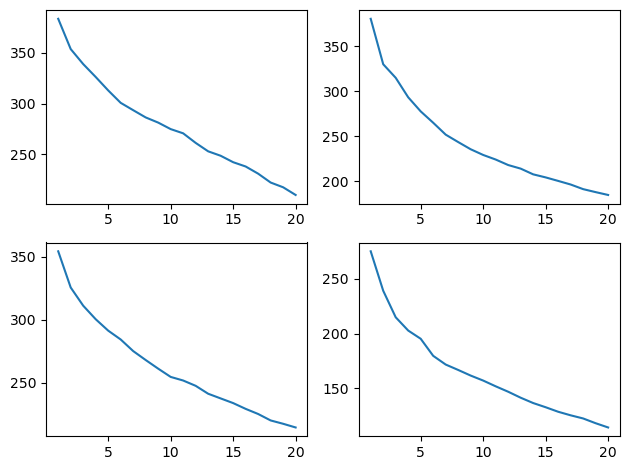

In [139]:
fig, ax = plt.subplots(2, 2)
 
# set data with subplots and plot
ax[0, 0].plot(qb)
ax[0, 1].plot(rb)
ax[1, 0].plot(wr)
ax[1, 1].plot(te)
fig.tight_layout()
plt.show() 

<AxesSubplot:xlabel='pos_rank'>

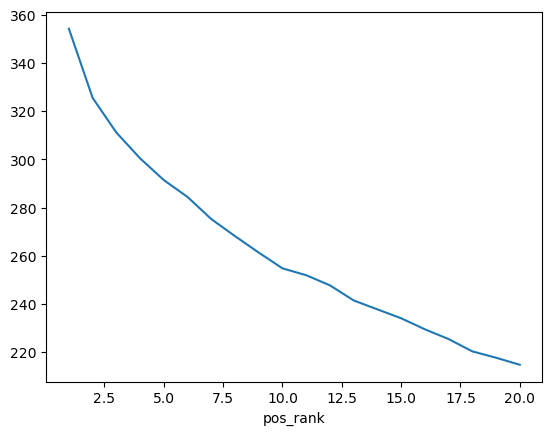

In [140]:
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:20].plot()

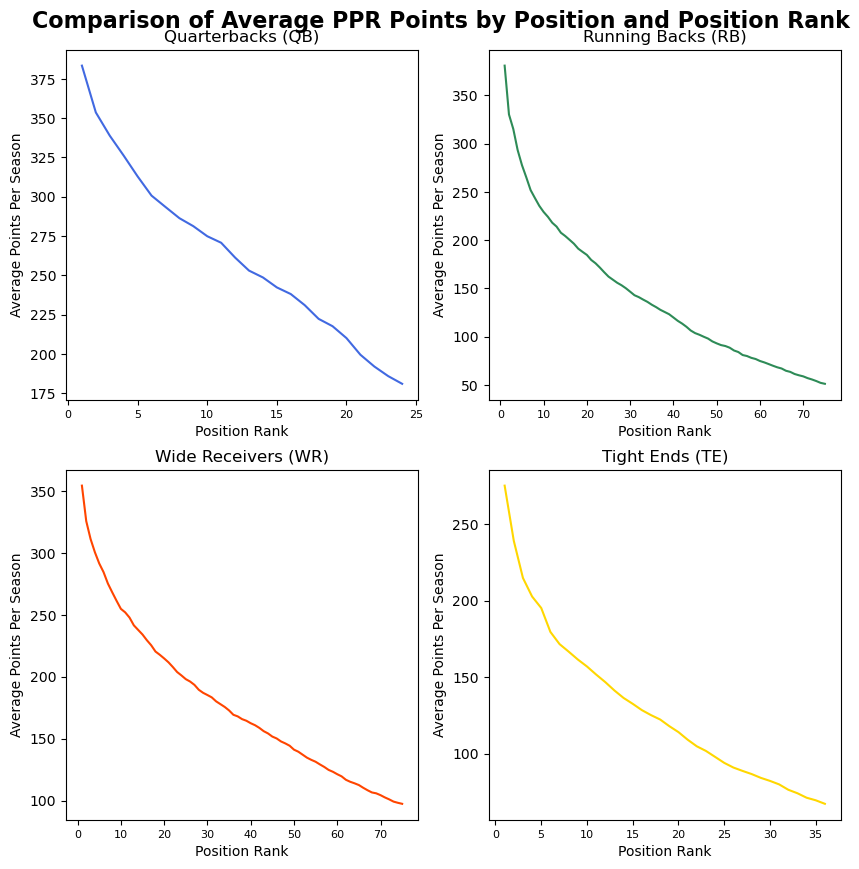

In [141]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Comparison of Average PPR Points by Position and Position Rank', fontsize=16, fontweight='bold', y=0.92)

axs[0, 0].set_title('Quarterbacks (QB)')
df[df.pos=='QB'].groupby('pos_rank')['ppr_pts'].mean()[0:24].plot(ax=axs[0, 0], color='royalblue')
axs[0, 0].set_xlabel('Position Rank')
axs[0, 0].set_ylabel('Average Points Per Season')
axs[0, 0].tick_params(axis='x', labelsize=8)

axs[0, 1].set_title('Running Backs (RB)')
df[df.pos=='RB'].groupby('pos_rank')['ppr_pts'].mean()[0:75].plot(ax=axs[0, 1], color='seagreen')
axs[0, 1].set_xlabel('Position Rank')
axs[0, 1].set_ylabel('Average Points Per Season')
axs[0, 1].tick_params(axis='x', labelsize=8)

axs[1, 0].set_title('Wide Receivers (WR)')
df[df.pos=='WR'].groupby('pos_rank')['ppr_pts'].mean()[0:75].plot(ax=axs[1, 0], color='orangered')
axs[1, 0].set_xlabel('Position Rank')
axs[1, 0].set_ylabel('Average Points Per Season')
axs[1, 0].tick_params(axis='x', labelsize=8)

axs[1, 1].set_title('Tight Ends (TE)')
df[df.pos=='TE'].groupby('pos_rank')['ppr_pts'].mean()[0:36].plot(ax=axs[1, 1], color='gold')
axs[1, 1].set_xlabel('Position Rank')
axs[1, 1].set_ylabel('Average Points Per Season')
axs[1, 1].tick_params(axis='x', labelsize=8)

plt.show()

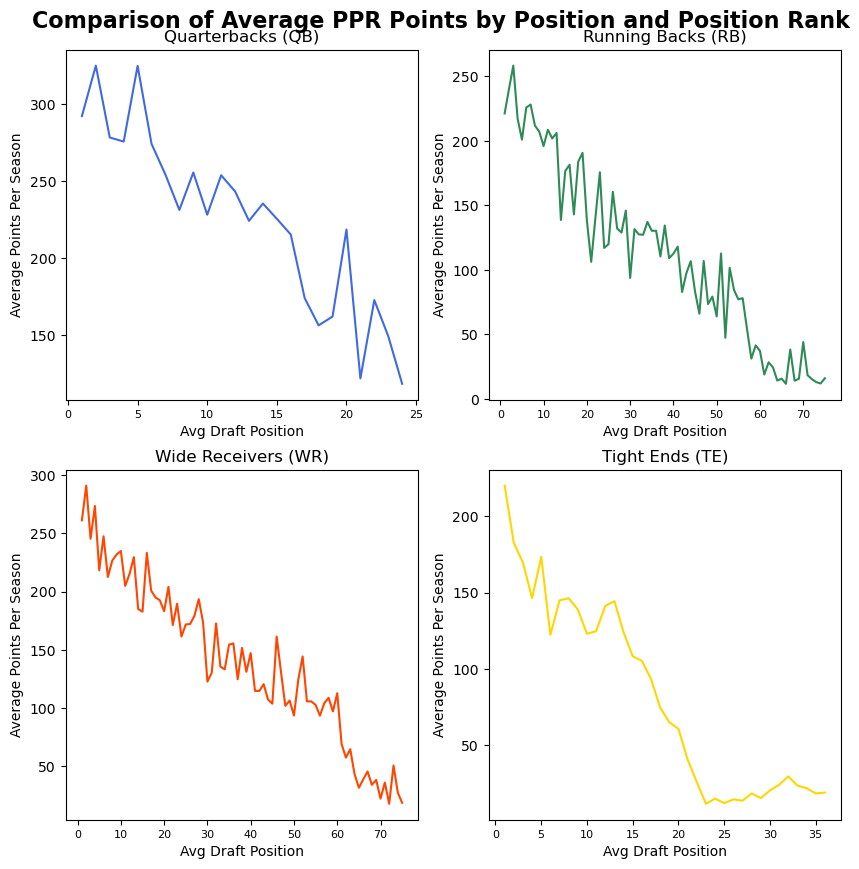

In [142]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Comparison of Average PPR Points by Position and Position Rank', fontsize=16, fontweight='bold', y=0.92)

axs[0, 0].set_title('Quarterbacks (QB)')
df[df.pos=='QB'].groupby('adp_by_pos')['ppr_pts'].mean()[0:24].plot(ax=axs[0, 0], color='royalblue')
axs[0, 0].set_xlabel('Avg Draft Position')
axs[0, 0].set_ylabel('Average Points Per Season')
axs[0, 0].tick_params(axis='x', labelsize=8)

axs[0, 1].set_title('Running Backs (RB)')
df[df.pos=='RB'].groupby('adp_by_pos')['ppr_pts'].mean()[0:75].plot(ax=axs[0, 1], color='seagreen')
axs[0, 1].set_xlabel('Avg Draft Position')
axs[0, 1].set_ylabel('Average Points Per Season')
axs[0, 1].tick_params(axis='x', labelsize=8)

axs[1, 0].set_title('Wide Receivers (WR)')
df[df.pos=='WR'].groupby('adp_by_pos')['ppr_pts'].mean()[0:75].plot(ax=axs[1, 0], color='orangered')
axs[1, 0].set_xlabel('Avg Draft Position')
axs[1, 0].set_ylabel('Average Points Per Season')
axs[1, 0].tick_params(axis='x', labelsize=8)

axs[1, 1].set_title('Tight Ends (TE)')
df[df.pos=='TE'].groupby('adp_by_pos')['ppr_pts'].mean()[0:36].plot(ax=axs[1, 1], color='gold')
axs[1, 1].set_xlabel('Avg Draft Position')
axs[1, 1].set_ylabel('Average Points Per Season')
axs[1, 1].tick_params(axis='x', labelsize=8)

plt.show()

In [145]:
viz_qb

,year,adp_by_pos,pos_rank,round,pos,ppr_pts
0,2010,54,1,15.0,QB,310.3
1,2010,1,2,1.0,QB,304.5
2,2010,4,3,3.0,QB,299.0
3,2010,3,4,2.0,QB,285.8
4,2010,7,5,4.0,QB,281.6
...,...,...,...,...,...,...
6542,2022,20,6,15.0,QB,296.0
6543,2022,21,7,15.0,QB,295.6
6544,2022,15,8,10.0,QB,291.6
6545,2022,24,9,15.0,QB,289.0


In [234]:
viz_3 = df[['year', 'adp_by_pos', 'pos_rank', 'round', 'pos', 'ppr_pts']]
viz_3 = viz_3[viz_3['pos_rank'] < 4]
viz_qb = viz_3[viz_3['pos'] == 'QB']
viz_rb = viz_3[viz_3['pos'] == 'RB']
viz_wr = viz_3[viz_3['pos'] == 'WR']
viz_te = viz_3[viz_3['pos'] == 'TE']

viz_3

,year,adp_by_pos,pos_rank,round,pos,ppr_pts
0,2010,54,1,15.0,QB,310.3
1,2010,1,2,1.0,QB,304.5
2,2010,4,3,3.0,QB,299.0
79,2010,18,1,4.0,RB,392.0
80,2010,16,2,3.0,RB,297.2
...,...,...,...,...,...,...
6783,2022,8,2,2.0,WR,347.2
6784,2022,5,3,2.0,WR,335.5
7000,2022,1,1,2.0,TE,316.3
7001,2022,9,2,8.0,TE,215.4


In [147]:
df[(df.pos_rank<6)&(df.pos=='QB')].groupby(['year', 'pos_rank','round'])[['player']].count()

player
year pos_rank round        
2010 1        15.0        1
     2        1.0         1
     3        3.0         1
     4        2.0         1
     5        4.0         1
...                     ...
2022 1        5.0         1
     2        2.0         1
     3        4.0         1
     4        6.0         1
     5        15.0        1

[65 rows x 1 columns]

In [148]:
df[(df.pos == 'TE') & (df.year == 2022)].sort_values('ppr_pts', ascending = False).head(50)

,rk,player,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,ppr_pts,vbd,pos_rank,year,adp,adp_by_pos,success,round
7000,8,Travis Kelce,KAN,TE,33,17,17,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.50,0.0,152.0,110.0,1338.0,12.16,12.0,1.0,1.0,12,316.3,114.0,1,2022,17.0,1,1.0,2.0
7001,29,T.J. Hockenson,2TM,TE,25,17,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,129.0,86.0,914.0,10.63,6.0,1.0,1.0,6,215.4,42.0,2,2022,91.0,9,1.0,8.0
7002,23,George Kittle,SFO,TE,29,15,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,86.0,60.0,765.0,12.75,11.0,1.0,1.0,11,200.5,52.0,3,2022,40.0,4,1.0,4.0
7003,41,Mark Andrews,BAL,TE,27,15,15,0.0,0.0,0.0,0.0,0.0,3.0,8.0,2.67,0.0,113.0,73.0,847.0,11.60,5.0,1.0,0.0,5,190.5,30.0,4,2022,26.0,2,0.0,3.0
7004,51,Evan Engram,JAX,TE,28,17,14,0.0,0.0,0.0,0.0,0.0,2.0,13.0,6.50,0.0,98.0,73.0,766.0,10.49,4.0,0.0,0.0,4,176.9,18.0,5,2022,372.0,32,1.0,15.0
7005,151,Tyler Higbee,LAR,TE,29,17,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,108.0,72.0,620.0,8.61,3.0,0.0,0.0,3,152.0,0.0,6,2022,184.0,20,1.0,15.0
7006,77,Pat Freiermuth,PIT,TE,24,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,98.0,63.0,732.0,11.62,2.0,0.0,0.0,2,148.2,0.0,7,2022,115.0,11,1.0,10.0
7007,57,Cole Kmet,CHI,TE,23,17,17,0.0,0.0,0.0,0.0,0.0,2.0,9.0,4.50,0.0,69.0,50.0,544.0,10.88,7.0,1.0,0.0,7,147.3,11.0,8,2022,135.0,14,1.0,12.0
7008,25,Taysom Hill,NOR,TE,32,16,8,13.0,19.0,240.0,2.0,0.0,96.0,575.0,5.99,7.0,13.0,9.0,77.0,8.56,2.0,2.0,0.0,9,145.8,49.0,9,2022,415.0,39,1.0,15.0
7009,73,Dalton Schultz,DAL,TE,26,15,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,89.0,57.0,577.0,10.12,5.0,1.0,1.0,5,142.7,0.0,10,2022,76.0,8,1.0,7.0


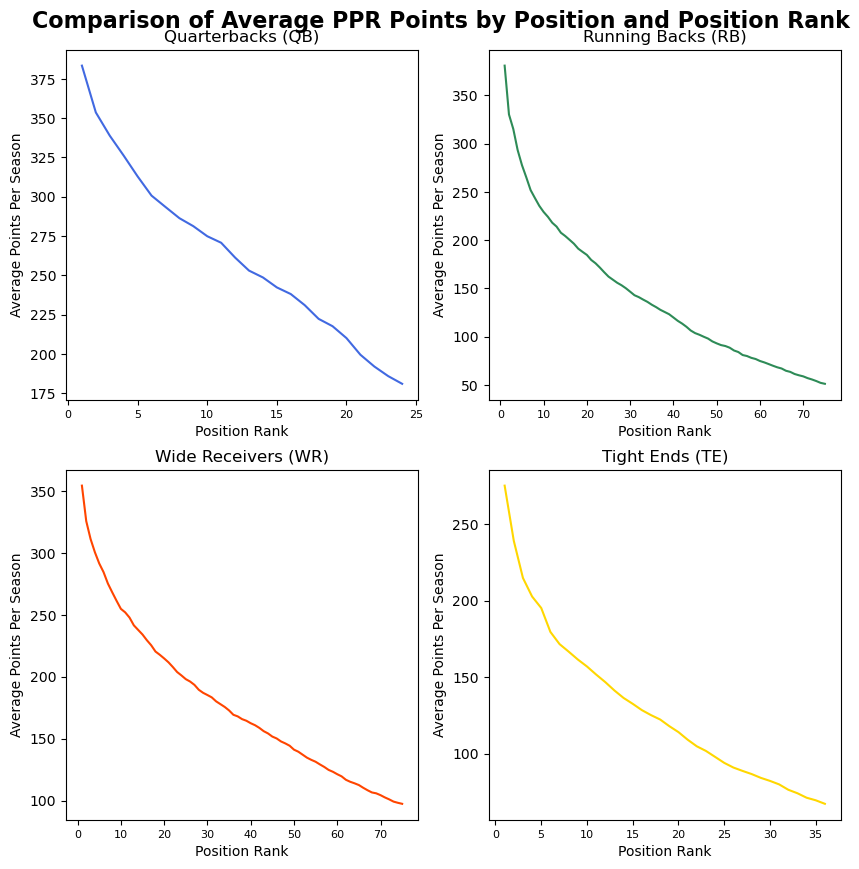

In [150]:
e.pnt_avg_by_pos_rank(df)

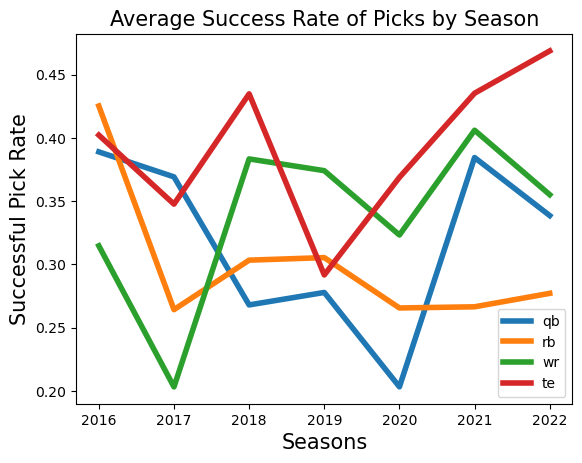

In [250]:
e.success_rate_by_season(success_rate_df)

In [152]:
viz_3.columns

Index(['year', 'adp_by_pos', 'pos_rank', 'round', 'pos', 'ppr_pts'], dtype='object')

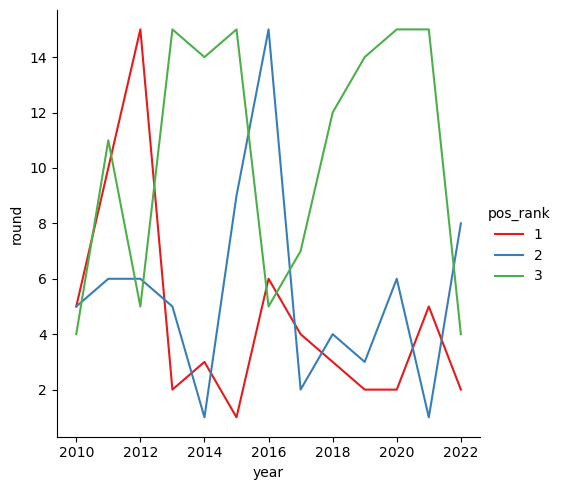

In [249]:
sns.relplot(y = 'round', x = 'year', hue = 'pos_rank', palette = 'Set1', data = viz_te, kind = 'line')


In [244]:
fig = px.scatter(viz_qb, x="year", y="round", color="round",
                 size='pos_rank', hover_data=['adp_by_pos'])
fig.show()

In [242]:
fig = px.scatter(viz_rb, x="pos_rank", y="round", size = 'pos_rank')
fig.show()

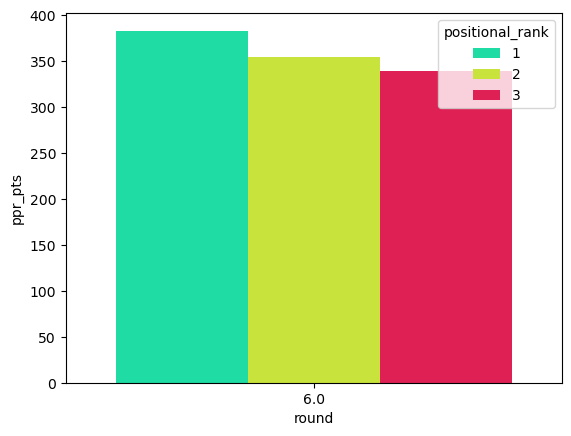

In [251]:
avg_qb = viz_qb
avg_qb = viz_qb[(viz_qb.pos=='QB') & (viz_qb.pos_rank < 4)].groupby('pos_rank')[['round', 'ppr_pts']].mean()
avg_qb['positional_rank'] = avg_qb.index
avg_qb = avg_qb.round(0)
sns.barplot(y = 'ppr_pts', x = 'round', palette = 'gist_ncar', data = avg_qb, hue = 'positional_rank')
plt.show() 

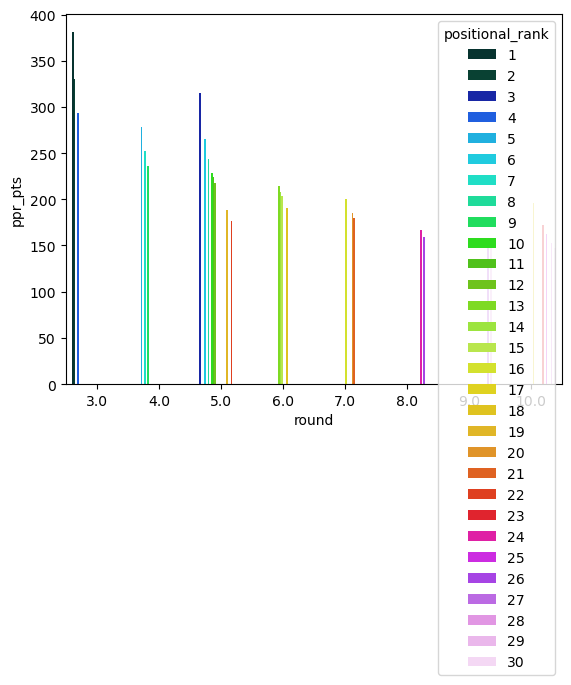

In [200]:
avg_rb = viz_rb
avg_rb = viz_rb[(viz_rb.pos=='RB') & (viz_rb.pos_rank < 31)].groupby('pos_rank')[['round', 'ppr_pts']].mean()
avg_rb['positional_rank'] = avg_rb.index
avg_rb = avg_rb.round(0)
sns.barplot(y = 'ppr_pts', x = 'round', palette = 'gist_ncar', data = avg_rb, hue = 'positional_rank')
plt.show() 

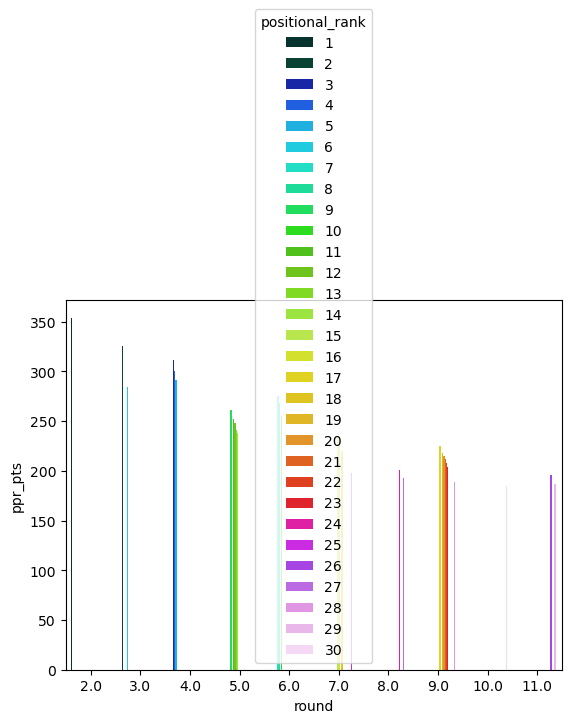

In [201]:
avg_wr = viz_wr
avg_wr = viz_wr[(viz_wr.pos=='WR') & (viz_wr.pos_rank < 31)].groupby('pos_rank')[['round', 'ppr_pts']].mean()
avg_wr['positional_rank'] = avg_wr.index
avg_wr = avg_wr.round(0)
sns.barplot(y = 'ppr_pts', x = 'round', palette = 'gist_ncar', data = avg_wr, hue = 'positional_rank')
plt.show() 

In [254]:
avg_te = viz_te
avg_te = viz_te[(viz_te.pos=='TE') & (viz_te.pos_rank < 21)].groupby('pos_rank')[['round', 'ppr_pts']].mean()
avg_te['positional_rank'] = avg_te.index
avg_te = avg_te.round(0)
sns.barplot(y = 'ppr_pts', x = 'round', palette = 'gist_ncar', data = avg_te, hue = 'positional_rank')
plt.show() 

ValueError: No axis named round for object type DataFrame

In [178]:
avg_te['ppr_pts'].max() - avg_te['ppr_pts'].min()

60.0

In [179]:
avg_rb['ppr_pts'].max() - avg_rb['ppr_pts'].min()

66.0

In [180]:
avg_wr['ppr_pts'].max() - avg_wr['ppr_pts'].min()

43.0

In [186]:
avg_qb['ppr_pts'].max() - avg_qb['ppr_pts'].min()

108.0

In [252]:
avg_qb

,round,ppr_pts,positional_rank
pos_rank,,,
1,6.0,383.0,1
2,6.0,354.0,2
3,6.0,339.0,3


In [203]:
avg_rb.head(30)

,round,ppr_pts,positional_rank
pos_rank,,,
1,3.0,381.0,1
2,3.0,330.0,2
3,5.0,315.0,3
4,3.0,293.0,4
5,4.0,278.0,5
6,5.0,265.0,6
7,4.0,252.0,7
8,5.0,244.0,8
9,4.0,236.0,9


In [265]:
top_3_wr = avg_wr.head(3)
top_3_wr

,round,ppr_pts,positional_rank
pos_rank,,,
1,2.0,354.0,1
2,3.0,326.0,2
3,4.0,311.0,3


In [207]:
avg_te.head(20)

,round,ppr_pts,positional_rank
pos_rank,,,
1,5.0,275.0,1
2,5.0,239.0,2
3,10.0,215.0,3
4,10.0,203.0,4
5,9.0,195.0,5
6,9.0,180.0,6
7,10.0,172.0,7
8,11.0,167.0,8
9,10.0,162.0,9


In [256]:
avg_success = df[['player', 'pos', 'success', 'round', 'adp', 'adp_by_pos', 'pos_rank', 'year', 'ppr_pts']]

In [263]:
avg_success[(avg_success['round'] == 1) & (avg_success['pos'] == 'RB')]

,player,pos,success,round,adp,adp_by_pos,pos_rank,year,ppr_pts
83,Ray Rice,RB,1.0,1.0,3.0,3,5,2010,276.6
84,Adrian Peterson,RB,1.0,1.0,2.0,2,6,2010,275.9
85,Chris Johnson,RB,0.0,1.0,1.0,1,7,2010,272.9
88,Steven Jackson,RB,0.0,1.0,11.0,7,10,2010,242.4
91,Maurice Jones-Drew,RB,0.0,1.0,4.0,4,13,2010,234.1
...,...,...,...,...,...,...,...,...,...
6625,Nick Chubb,RB,1.0,1.0,7.0,5,6,2022,281.4
6630,Dalvin Cook,RB,0.0,1.0,4.0,4,11,2022,237.8
6633,Najee Harris,RB,0.0,1.0,10.0,7,14,2022,223.5
6640,D'Andre Swift,RB,0.0,1.0,11.0,8,21,2022,191.1


In [375]:
non_inj = df[df.g>=12]

In [373]:
# The rate of injury by position by round
non_inj.groupby(['pos','round'])[['success']].count()/df.groupby(['pos','round'])[['success']].count()

success
pos round          
QB  1.0    1.000000
    2.0    0.923077
    3.0    0.846154
    4.0    0.857143
    5.0    0.833333
    6.0    0.935484
    7.0    0.826087
    8.0    0.954545
    9.0    0.772727
    10.0   0.904762
    11.0   0.750000
    12.0   0.650000
    13.0   0.619048
    14.0   0.750000
    15.0   0.199438
RB  1.0    0.768421
    2.0    0.835821
    3.0    0.758065
    4.0    0.754717
    5.0    0.666667
    6.0    0.690476
    7.0    0.769231
    8.0    0.816327
    9.0    0.818182
    10.0   0.696970
    11.0   0.763158
    12.0   0.593750
    13.0   0.555556
    14.0   0.702703
    15.0   0.546355
TE  1.0    1.000000
    2.0    0.666667
    3.0    0.666667
    4.0    0.785714
    5.0    0.619048
    6.0    0.777778
    7.0    0.708333
    8.0    0.823529
    9.0    0.875000
    10.0   0.692308
    11.0   0.833333
    12.0   0.916667
    13.0   0.791667
    14.0   0.851852
    15.0   0.700169
WR  1.0    0.880952
    2.0    0.880597
    3.0    0.861538
    4.0    0.890411
    5.0    0.847458
    6.0    0.771930
    7.0    0.702128
    8.0    0.792453
    9.0    0.875000
    10.0   0.840000
    11.0   0.772727
    12.0   0.673077
    13.0   0.689655
    14.0   0.702703
    15.0   0.569046

In [368]:
rnk_avg = non_inj[['pos', 'ppr_pts', 'round', 'pos_rank', 'success']]
rnk_avg

,pos,ppr_pts,round,pos_rank,success
0,QB,310.3,15.0,1,1.0
1,QB,304.5,1.0,2,1.0
2,QB,299.0,3.0,3,1.0
3,QB,285.8,2.0,4,0.0
4,QB,281.6,4.0,5,1.0
...,...,...,...,...,...
7098,TE,6.6,15.0,99,0.0
7102,TE,4.9,15.0,103,0.0
7105,TE,3.9,15.0,106,0.0
7106,TE,3.1,15.0,107,0.0


In [306]:
rnk_avg_qb = rnk_avg[rnk_avg['pos'] == 'QB']

rnk_avg_qb = rnk_avg_qb.groupby('round')[['pos_rank']].mean()
rnk_avg_qb['round_sel'] = rnk_avg_qb.index

plt.plot(rnk_avg_qb.round_sel, rnk_avg_qb.pos_rank, linewidth = 4)
plt.title('QB Positional Rank by Round', fontdict = { 'fontsize': 15})
plt.ylabel('Average Position Rank', fontdict = { 'fontsize': 15})
plt.xlabel('Round of Draft', fontdict = { 'fontsize': 15})
plt.show()

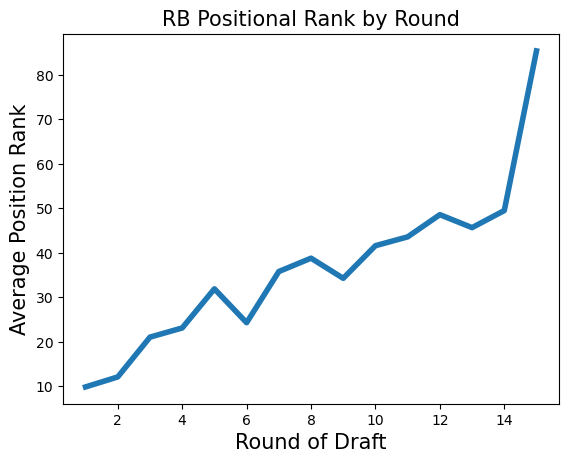

In [327]:
rnk_avg_rb = rnk_avg[rnk_avg['pos'] == 'RB']

rnk_avg_rb = rnk_avg_rb.groupby('round')[['pos_rank']].mean()
rnk_avg_rb['round_sel'] = rnk_avg_rb.index

plt.plot(rnk_avg_rb.round_sel, rnk_avg_rb.pos_rank, linewidth = 4)
plt.title('RB Positional Rank by Round', fontdict = { 'fontsize': 15})
plt.ylabel('Average Position Rank', fontdict = { 'fontsize': 15})
plt.xlabel('Round of Draft', fontdict = { 'fontsize': 15})
plt.show()

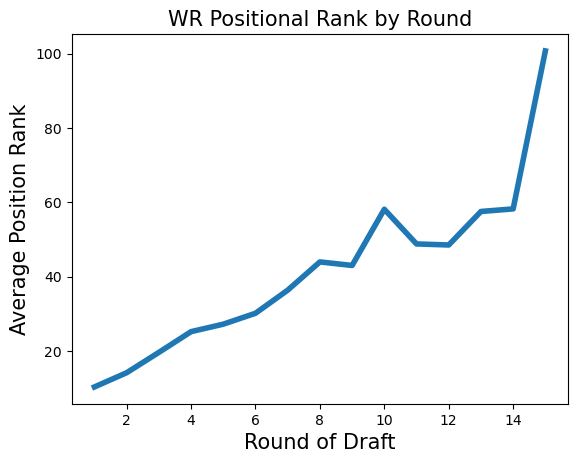

In [328]:
rnk_avg_wr = rnk_avg[rnk_avg['pos'] == 'WR']

rnk_avg_wr = rnk_avg_wr.groupby('round')[['pos_rank']].mean()
rnk_avg_wr['round_sel'] = rnk_avg_wr.index

plt.plot(rnk_avg_wr.round_sel, rnk_avg_wr.pos_rank, linewidth = 4)
plt.title('WR Positional Rank by Round', fontdict = { 'fontsize': 15})
plt.ylabel('Average Position Rank', fontdict = { 'fontsize': 15})
plt.xlabel('Round of Draft', fontdict = { 'fontsize': 15})
plt.show()

In [ ]:
rnk_avg_te = rnk_avg[rnk_avg['pos'] == 'TE']

rnk_avg_te = rnk_avg_te.groupby('round')[['pos_rank']].mean()
rnk_avg_te['round_sel'] = rnk_avg_te.index

plt.plot(rnk_avg_te.round_sel, rnk_avg_te.pos_rank, linewidth = 4)
plt.title('TE Positional Rank by Round', fontdict = { 'fontsize': 15})
plt.ylabel('Average Position Rank', fontdict = { 'fontsize': 15})
plt.xlabel('Round of Draft', fontdict = { 'fontsize': 15})
plt.show()

In [378]:
def avg_pos_rnk_by_rnd(df):
    fig, axs = plt.subplots(4, 3, figsize=(10, 12))
    fig.suptitle('Comparison of Average Positional Rank by Round Drafted', fontsize=16, fontweight='bold', y=0.92)

    df[df.pos=='QB'].groupby('round')[['pos_rank']].mean().plot(ax=axs[0, 0], color='royalblue')
    axs[0, 0].set_xlabel('Round Drafted')
    axs[0, 0].set_ylabel('Average Final Rank')
    axs[0, 0].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='QB'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[0, 1], color='royalblue')
    axs[0, 1].set_xlabel('Round Drafted')
    axs[0, 1].set_ylabel('Average Points')
    axs[0, 1].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='QB'].groupby('round')[['success']].mean().plot(ax=axs[0, 2], color='royalblue')
    axs[0, 2].set_xlabel('Round Drafted')
    axs[0, 2].set_ylabel('Success Rate')
    axs[0, 2].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='RB'].groupby('round')[['pos_rank']].mean().plot(ax=axs[1, 0], color='seagreen')
    axs[1, 0].set_xlabel('Round Drafted')
    axs[1, 0].set_ylabel('Average Final Rank')
    axs[1, 0].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='RB'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[1, 1], color='seagreen')
    axs[1, 1].set_xlabel('Round Drafted')
    axs[1, 1].set_ylabel('Average Points')
    axs[1, 1].tick_params(axis='x', labelsize=8)

    df[df.pos=='RB'].groupby('round')[['success']].mean().plot(ax=axs[1, 2], color='seagreen')
    axs[1, 2].set_xlabel('Round Drafted')
    axs[1, 2].set_ylabel('Success Rate')
    axs[1, 2].tick_params(axis='x', labelsize=8)    
    
    df[df.pos=='WR'].groupby('round')[['pos_rank']].mean().plot(ax=axs[2, 0], color='orangered')
    axs[2, 0].set_xlabel('Round Drafted')
    axs[2, 0].set_ylabel('Average Final Rank')
    axs[2, 0].tick_params(axis='x', labelsize=8)

    df[df.pos=='WR'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[2, 1], color='orangered')
    axs[2, 1].set_xlabel('Round Drafted')
    axs[2, 1].set_ylabel('Average Points')
    axs[2, 1].tick_params(axis='x', labelsize=8)    
    
    df[df.pos=='WR'].groupby('round')[['success']].mean().plot(ax=axs[2, 2], color='orangered')
    axs[2, 2].set_xlabel('Round Drafted')
    axs[2, 2].set_ylabel('Success Rate')
    axs[2, 2].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='TE'].groupby('round')[['pos_rank']].mean().plot(ax=axs[3, 0], color='gold')
    axs[3, 0].set_xlabel('Round Drafted')
    axs[3, 0].set_ylabel('Average Final Rank')
    axs[3, 0].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='TE'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[3, 1], color='gold')
    axs[3, 1].set_xlabel('Round Drafted')
    axs[3, 1].set_ylabel('Average Points')
    axs[3, 1].tick_params(axis='x', labelsize=8)
    
    df[df.pos=='TE'].groupby('round')[['success']].mean().plot(ax=axs[3, 2], color='gold')
    axs[3, 2].set_xlabel('Round Drafted')
    axs[3, 2].set_ylabel('Success Rate')
    axs[3, 2].tick_params(axis='x', labelsize=8)

    plt.show()

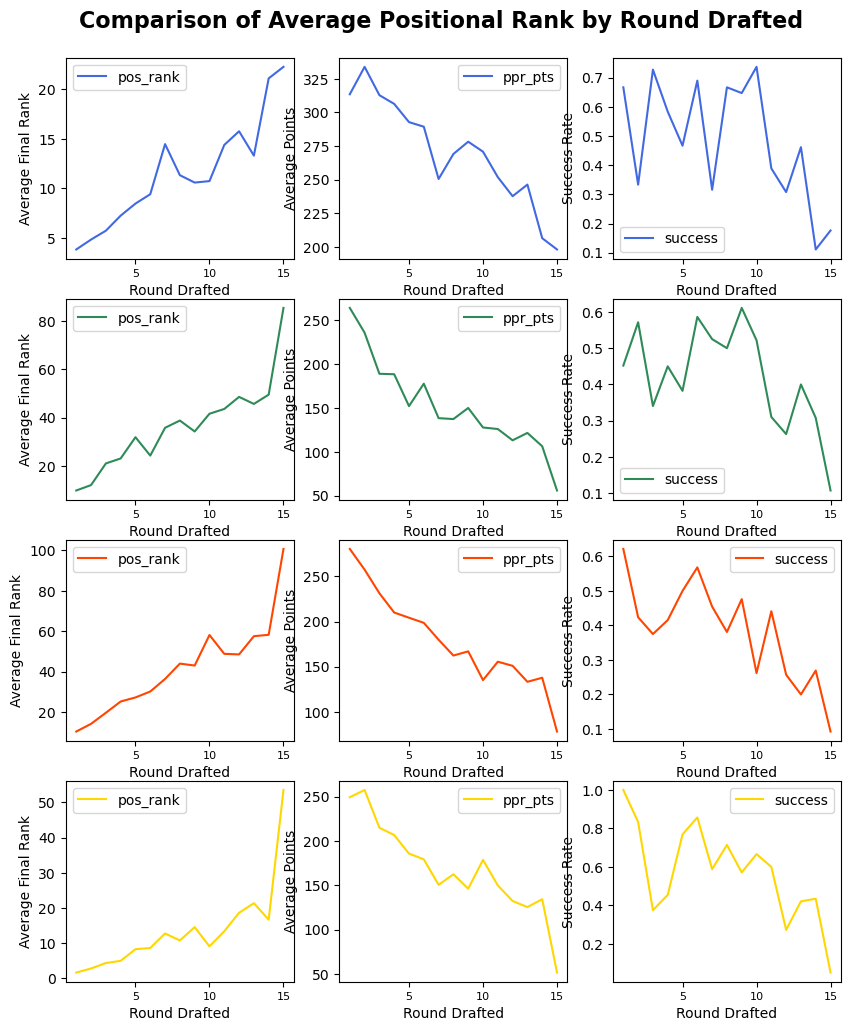

In [379]:
avg_pos_rnk_by_rnd(rnk_avg)

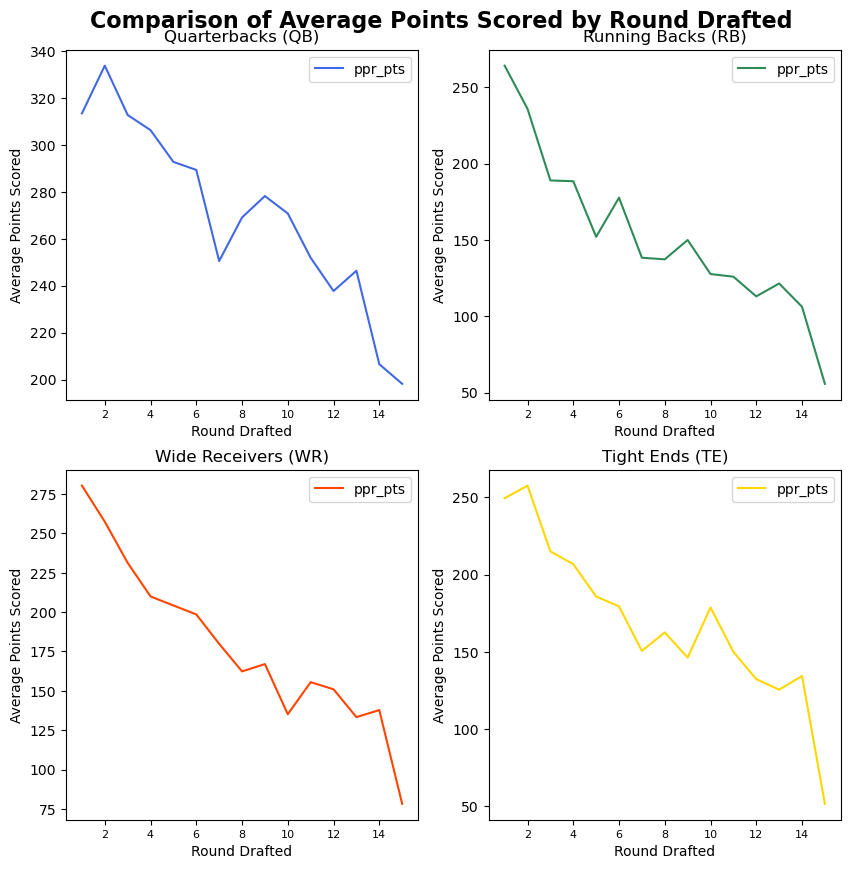

In [349]:
avg_points_rnk_by_rnd(rnk_avg)

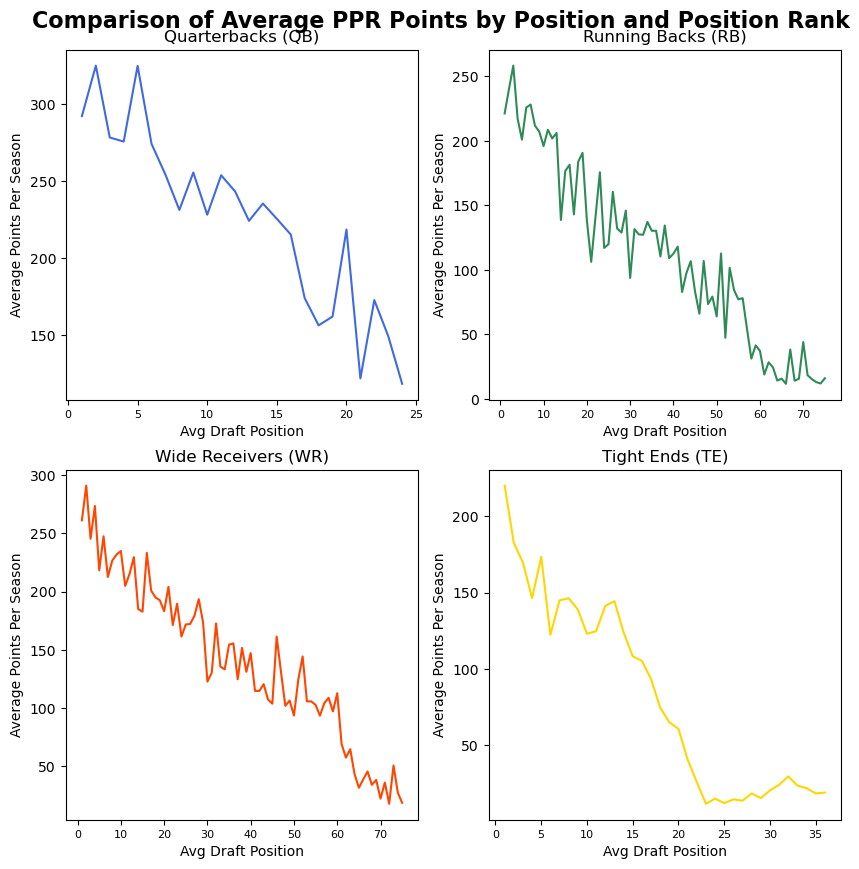

In [330]:
e.avg_pts_by_adp(df)

In [346]:
def avg_points_rnk_by_rnd(df):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Comparison of Average Points Scored by Round Drafted', fontsize=16, fontweight='bold', y=0.92)

    axs[0, 0].set_title('Quarterbacks (QB)')
    df[df.pos=='QB'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[0, 0], color='royalblue')
    axs[0, 0].set_xlabel('Round Drafted')
    axs[0, 0].set_ylabel('Average Points Scored')
    axs[0, 0].tick_params(axis='x', labelsize=8)

    axs[0, 1].set_title('Running Backs (RB)')
    df[df.pos=='RB'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[0, 1], color='seagreen')
    axs[0, 1].set_xlabel('Round Drafted')
    axs[0, 1].set_ylabel('Average Points Scored')
    axs[0, 1].tick_params(axis='x', labelsize=8)

    axs[1, 0].set_title('Wide Receivers (WR)')
    df[df.pos=='WR'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[1, 0], color='orangered')
    axs[1, 0].set_xlabel('Round Drafted')
    axs[1, 0].set_ylabel('Average Points Scored')
    axs[1, 0].tick_params(axis='x', labelsize=8)

    axs[1, 1].set_title('Tight Ends (TE)')
    df[df.pos=='TE'].groupby('round')[['ppr_pts']].mean().plot(ax=axs[1, 1], color='gold')
    axs[1, 1].set_xlabel('Round Drafted')
    axs[1, 1].set_ylabel('Average Points Scored')
    axs[1, 1].tick_params(axis='x', labelsize=8)

    plt.show()

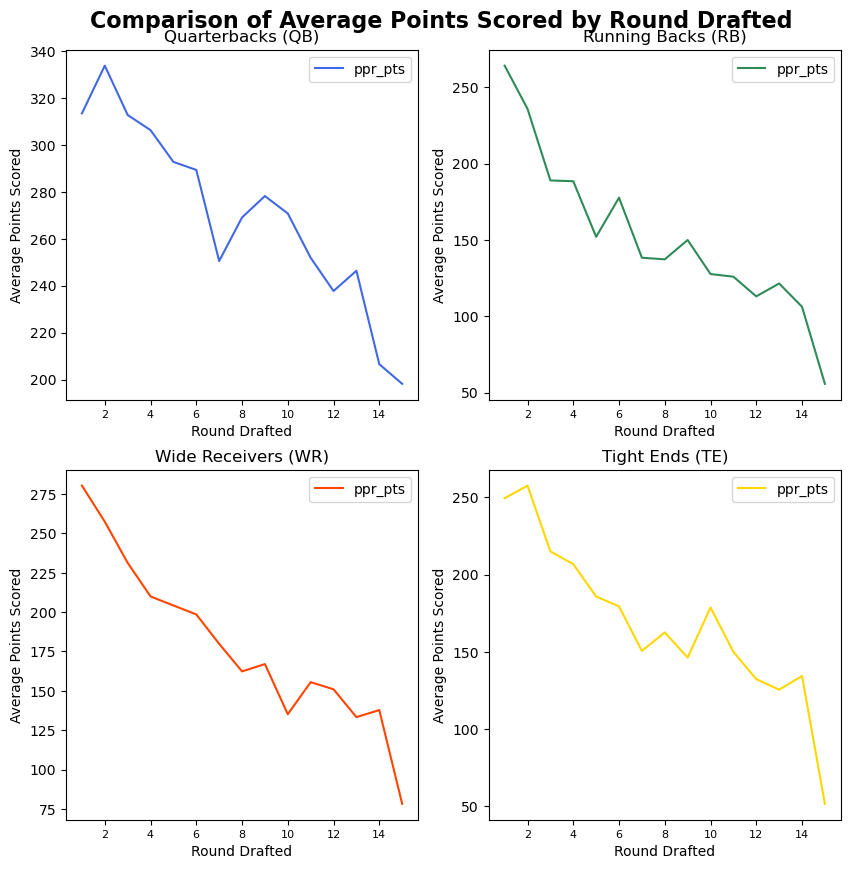

In [348]:
avg_points_rnk_by_rnd(rnk_avg)